<a href="https://colab.research.google.com/github/Indigo-Coder-github/23_1_Database/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import OrderedDict

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, recall_score, f1_score, confusion_matrix, precision_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier


# 모델 import
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
import statsmodels.formula.api as smf
import statsmodels.api as sm
import graphviz
import pydotplus

# EDA package
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl


# warnings 끄기
warnings.filterwarnings('ignore')

# pandas display option view row & columns
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 1000)

# # matplotlib set
plt.rc('font', family='DejaVu Sans')  # For MacOS
plt.rc('axes', unicode_minus=False)

%matplotlib inline

In [ ]:
data = pd.read_csv('HR Employee Attrition.csv')
data.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  \
1465            2061                        3   Male          41   
1466            2062                        4   Male          42   
1467            2064                        2   Male          87   
1468            2065                        4   Male          63   
1469            2068                        2   Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1465       Married           2571        12290                   4      Y   
1466       Married           9991        21457                   4      Y   
1467       Married           6142         5174                   1      Y   
1468       Married           5390        13243                   2      Y   
1469       Married           4404        10228                   2      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1465       No                 17                  3                         3   
1466       No                 15                  3                         1   
1467      Yes                 20                  4                         2   
1468       No                 14                  3                         4   
1469       No                 12                  3                         1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1465             80                 1                 17   
1466             80                 1                  9   
1467             80                 1                  6   
1468             80                 0                 17   
1469             80                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2

In [ ]:
# EnvironmentSatisfaction
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'EnvironmentSatisfaction': change_dict}, inplace=True)
data['EnvironmentSatisfaction'].unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

In [ ]:
# Education
change_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
data.replace({'Education': change_dict}, inplace=True)
data['Education'].unique()

array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

In [ ]:
# JobInvolvement
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobInvolvement': change_dict}, inplace=True)
data['JobInvolvement'].unique()

array(['High', 'Medium', 'Very High', 'Low'], dtype=object)

In [ ]:
# PerformanceRating
change_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
data.replace({'PerformanceRating': change_dict}, inplace=True)
data['PerformanceRating'].unique()

array(['Excellent', 'Outstanding'], dtype=object)

In [ ]:
# RelationshipSatisfaction
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'RelationshipSatisfaction': change_dict}, inplace=True)
data['RelationshipSatisfaction'].unique()

array(['Low', 'Very High', 'Medium', 'High'], dtype=object)

In [ ]:
# WorkLifeBalance
change_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
data.replace({'WorkLifeBalance': change_dict}, inplace=True)
data['WorkLifeBalance'].unique()

array(['Bad', 'Better', 'Good', 'Best'], dtype=object)

In [ ]:
# JobLevel, StockOptionLevel, TrainingTimesLastYear, NumCompaniesWorked, TotalWorkingYears
data = data.astype({'JobLevel': object, 'StockOptionLevel': object, 'NumCompaniesWorked': object})
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome      Education EducationField  EmployeeCount  \
0                    1        College  Life Sciences              1   
1                    8  Below College  Life Sciences              1   
2                    2        College          Other              1   
3                    3         Master  Life Sciences              1   
4                    2  Below College        Medical              1   
...                ...            ...            ...            ...   
1465                23        College        Medical              1   
1466                 6  Below College        Medical              1   
1467                 4       Bachelor  Life Sciences              1   
1468                 2       Bachelor        Medical              1   
1469                 8       Bachelor        Medical              1   

      EmployeeNumber EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                  Medium  Female          94   
1                  2                    High    Male          61   
2                  4               Very High    Male          92   
3                  5               Very High  Female          56   
4                  7                     Low    Male          40   
...              ...                     ...     ...         ...   
1465            2061                    High    Male          41   
1466            2062               Very High    Male          42   
1467            2064                  Medium    Male          87   
1468            2065               Very High    Male          63   
1469            2068                  Medium    Male          82   

     JobInvolvement JobLevel                    JobRole  JobSatisfaction  \
0              High        2            Sales Executive                4   
1            Medium        2         Research Scientist                2   
2            Medium        1      Laboratory Technician                3   
3              High        1         Research Scientist                3   
4              High        1      Laboratory Technician                2   
...             ...      ...                        ...              ...   
1465      Very High        2      Laboratory Technician                4   
1466         Medium        3  Healthcare Representative                1   
1467      Very High        2     Manufacturing Director                2   
1468         Medium        2            Sales Executive                2   
1469      Very High        2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate NumCompaniesWorked Over18  \
0           Single           5993        19479                  8      Y   
1          Married           5130        24907                  1      Y   
2           Single           2090         2396                  6      Y   
3          Married           2909        23159                  1      Y   
4          Married           3468        16632                  9      Y   
...            ...            ...         

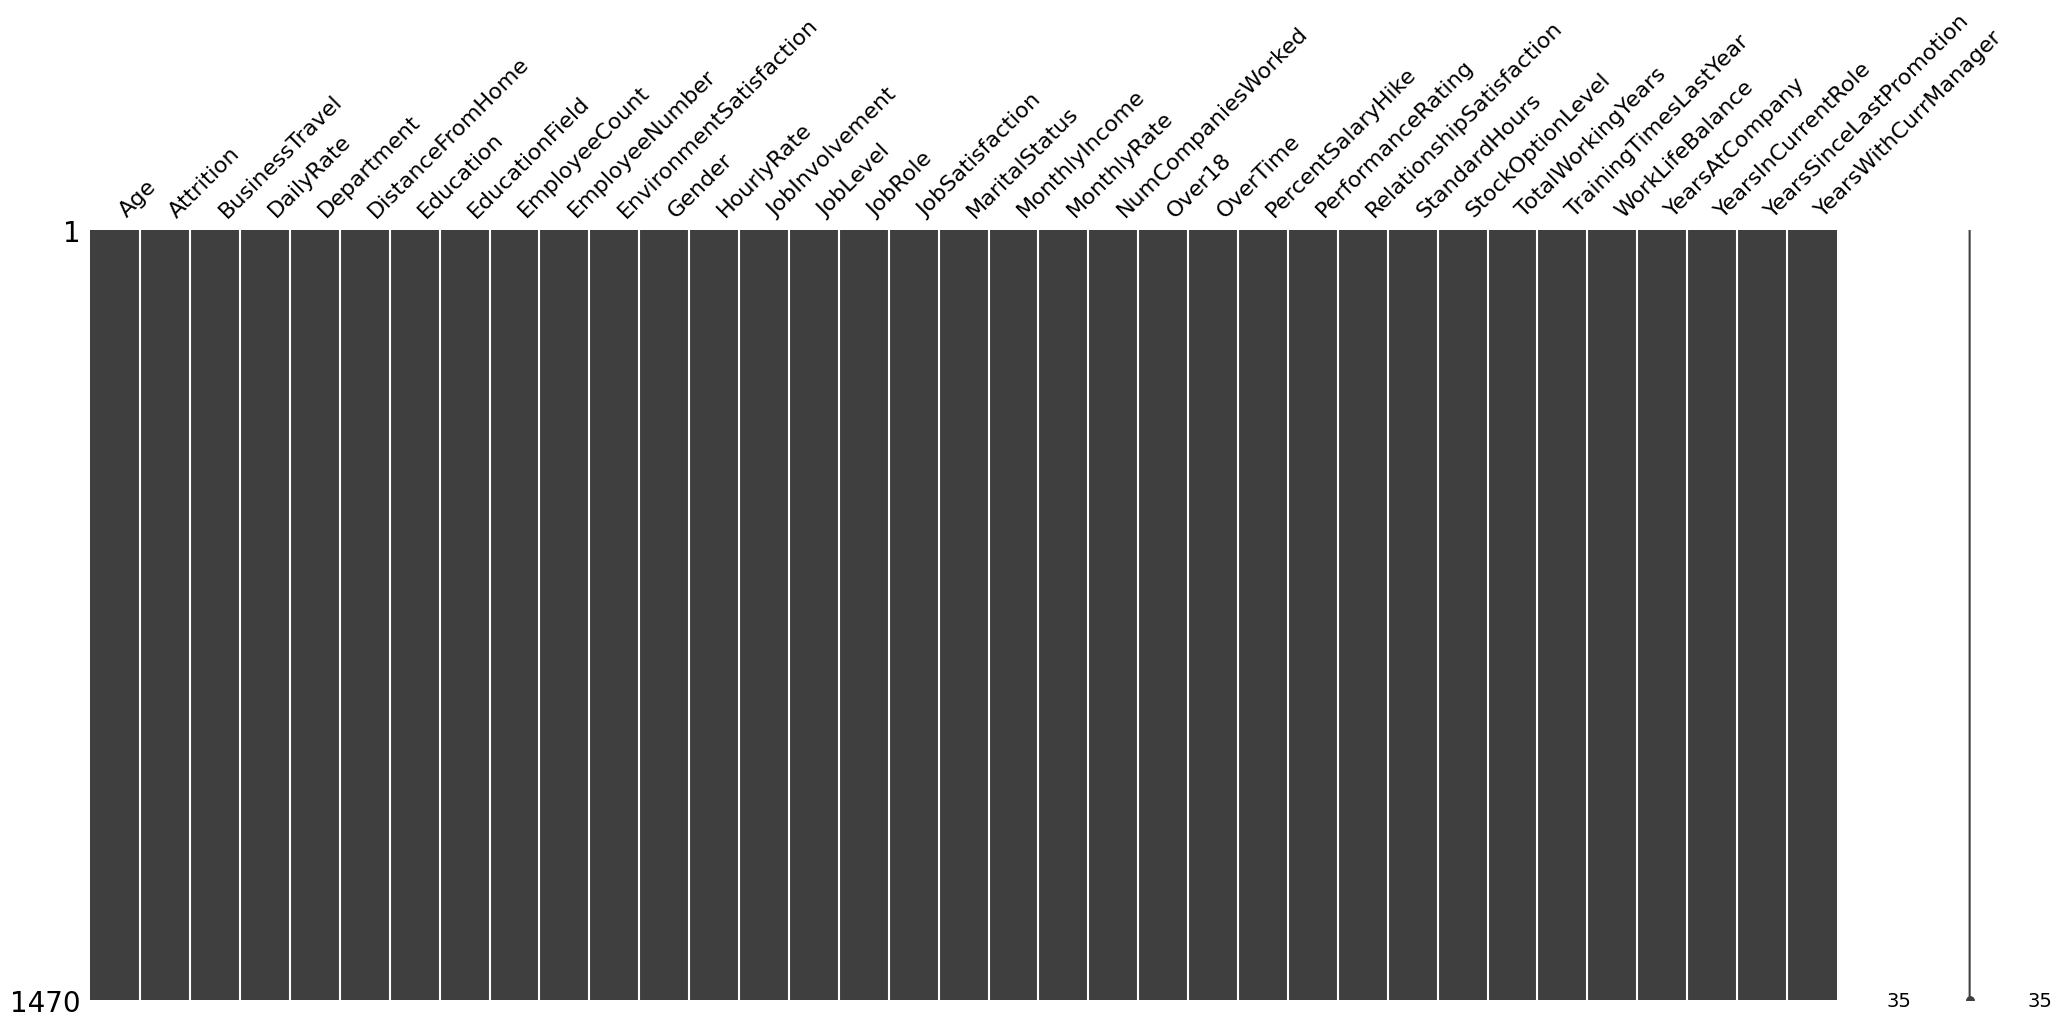

In [ ]:
missingno.matrix(data)
plt.show()

In [ ]:
print('Attrition 비율')
print(f'{data.Attrition.value_counts().index[0]} : {round(data.Attrition.value_counts()[0] / len(data), 2) * 100}%')
print(f'{data.Attrition.value_counts().index[1]} : {round(data.Attrition.value_counts()[1] / len(data), 2) * 100}%')


Attrition 비율
No : 84.0%
Yes : 16.0%


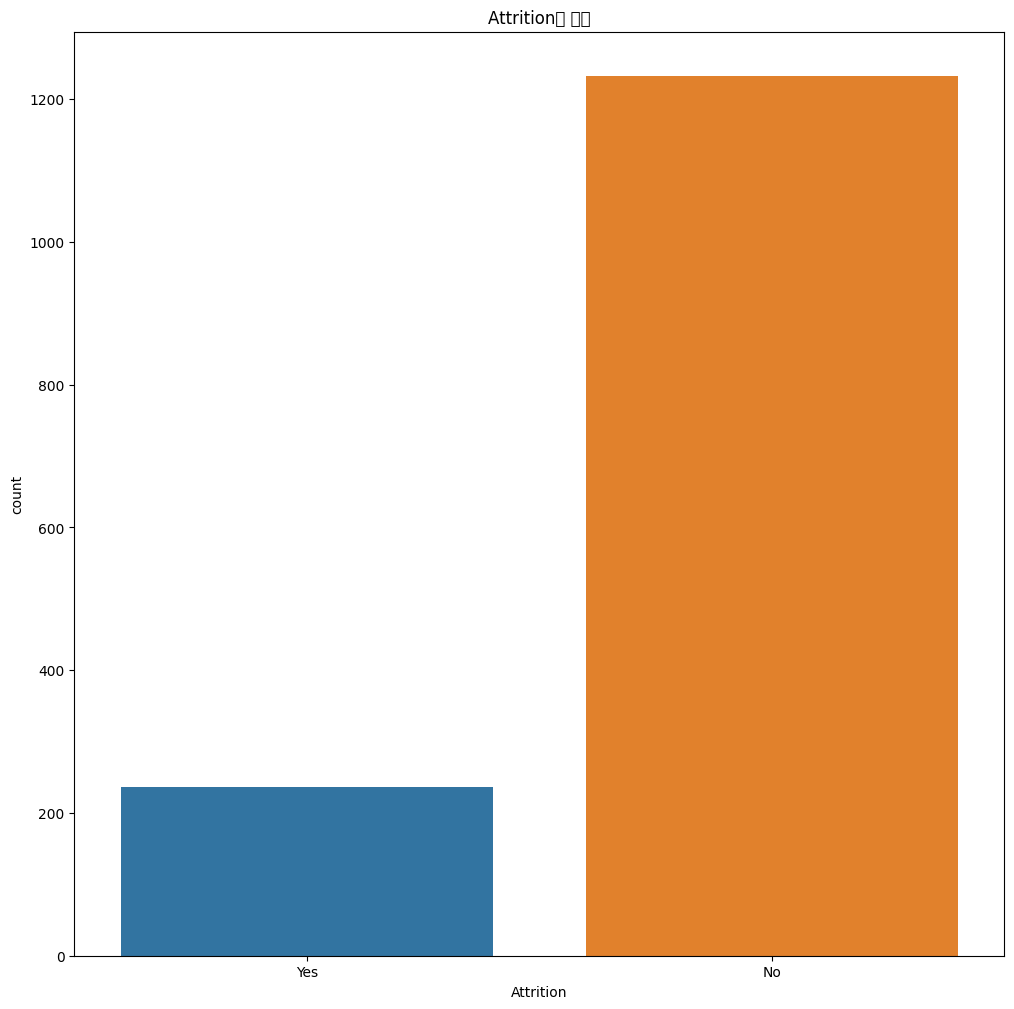

In [ ]:
plt.figure(figsize = (12,12))
sns.countplot(x = data['Attrition'])
plt.title('Attrition의 분포')
plt.show()

In [ ]:
# category column
cate_cols = []
for column in data.columns:
    if data[column].dtype == object:
        cate_cols.append(column)
        print('=============================================================================================')
        print(f'{column} : {data[column].unique()}')
        print(f'{data[column].value_counts()}')
        print()
        
print()
print(f'object column의 갯수 : {len(cate_cols)} 개')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Education : ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

EnvironmentSatisfaction : ['Medium' 'High' 'Very High' 'Low']


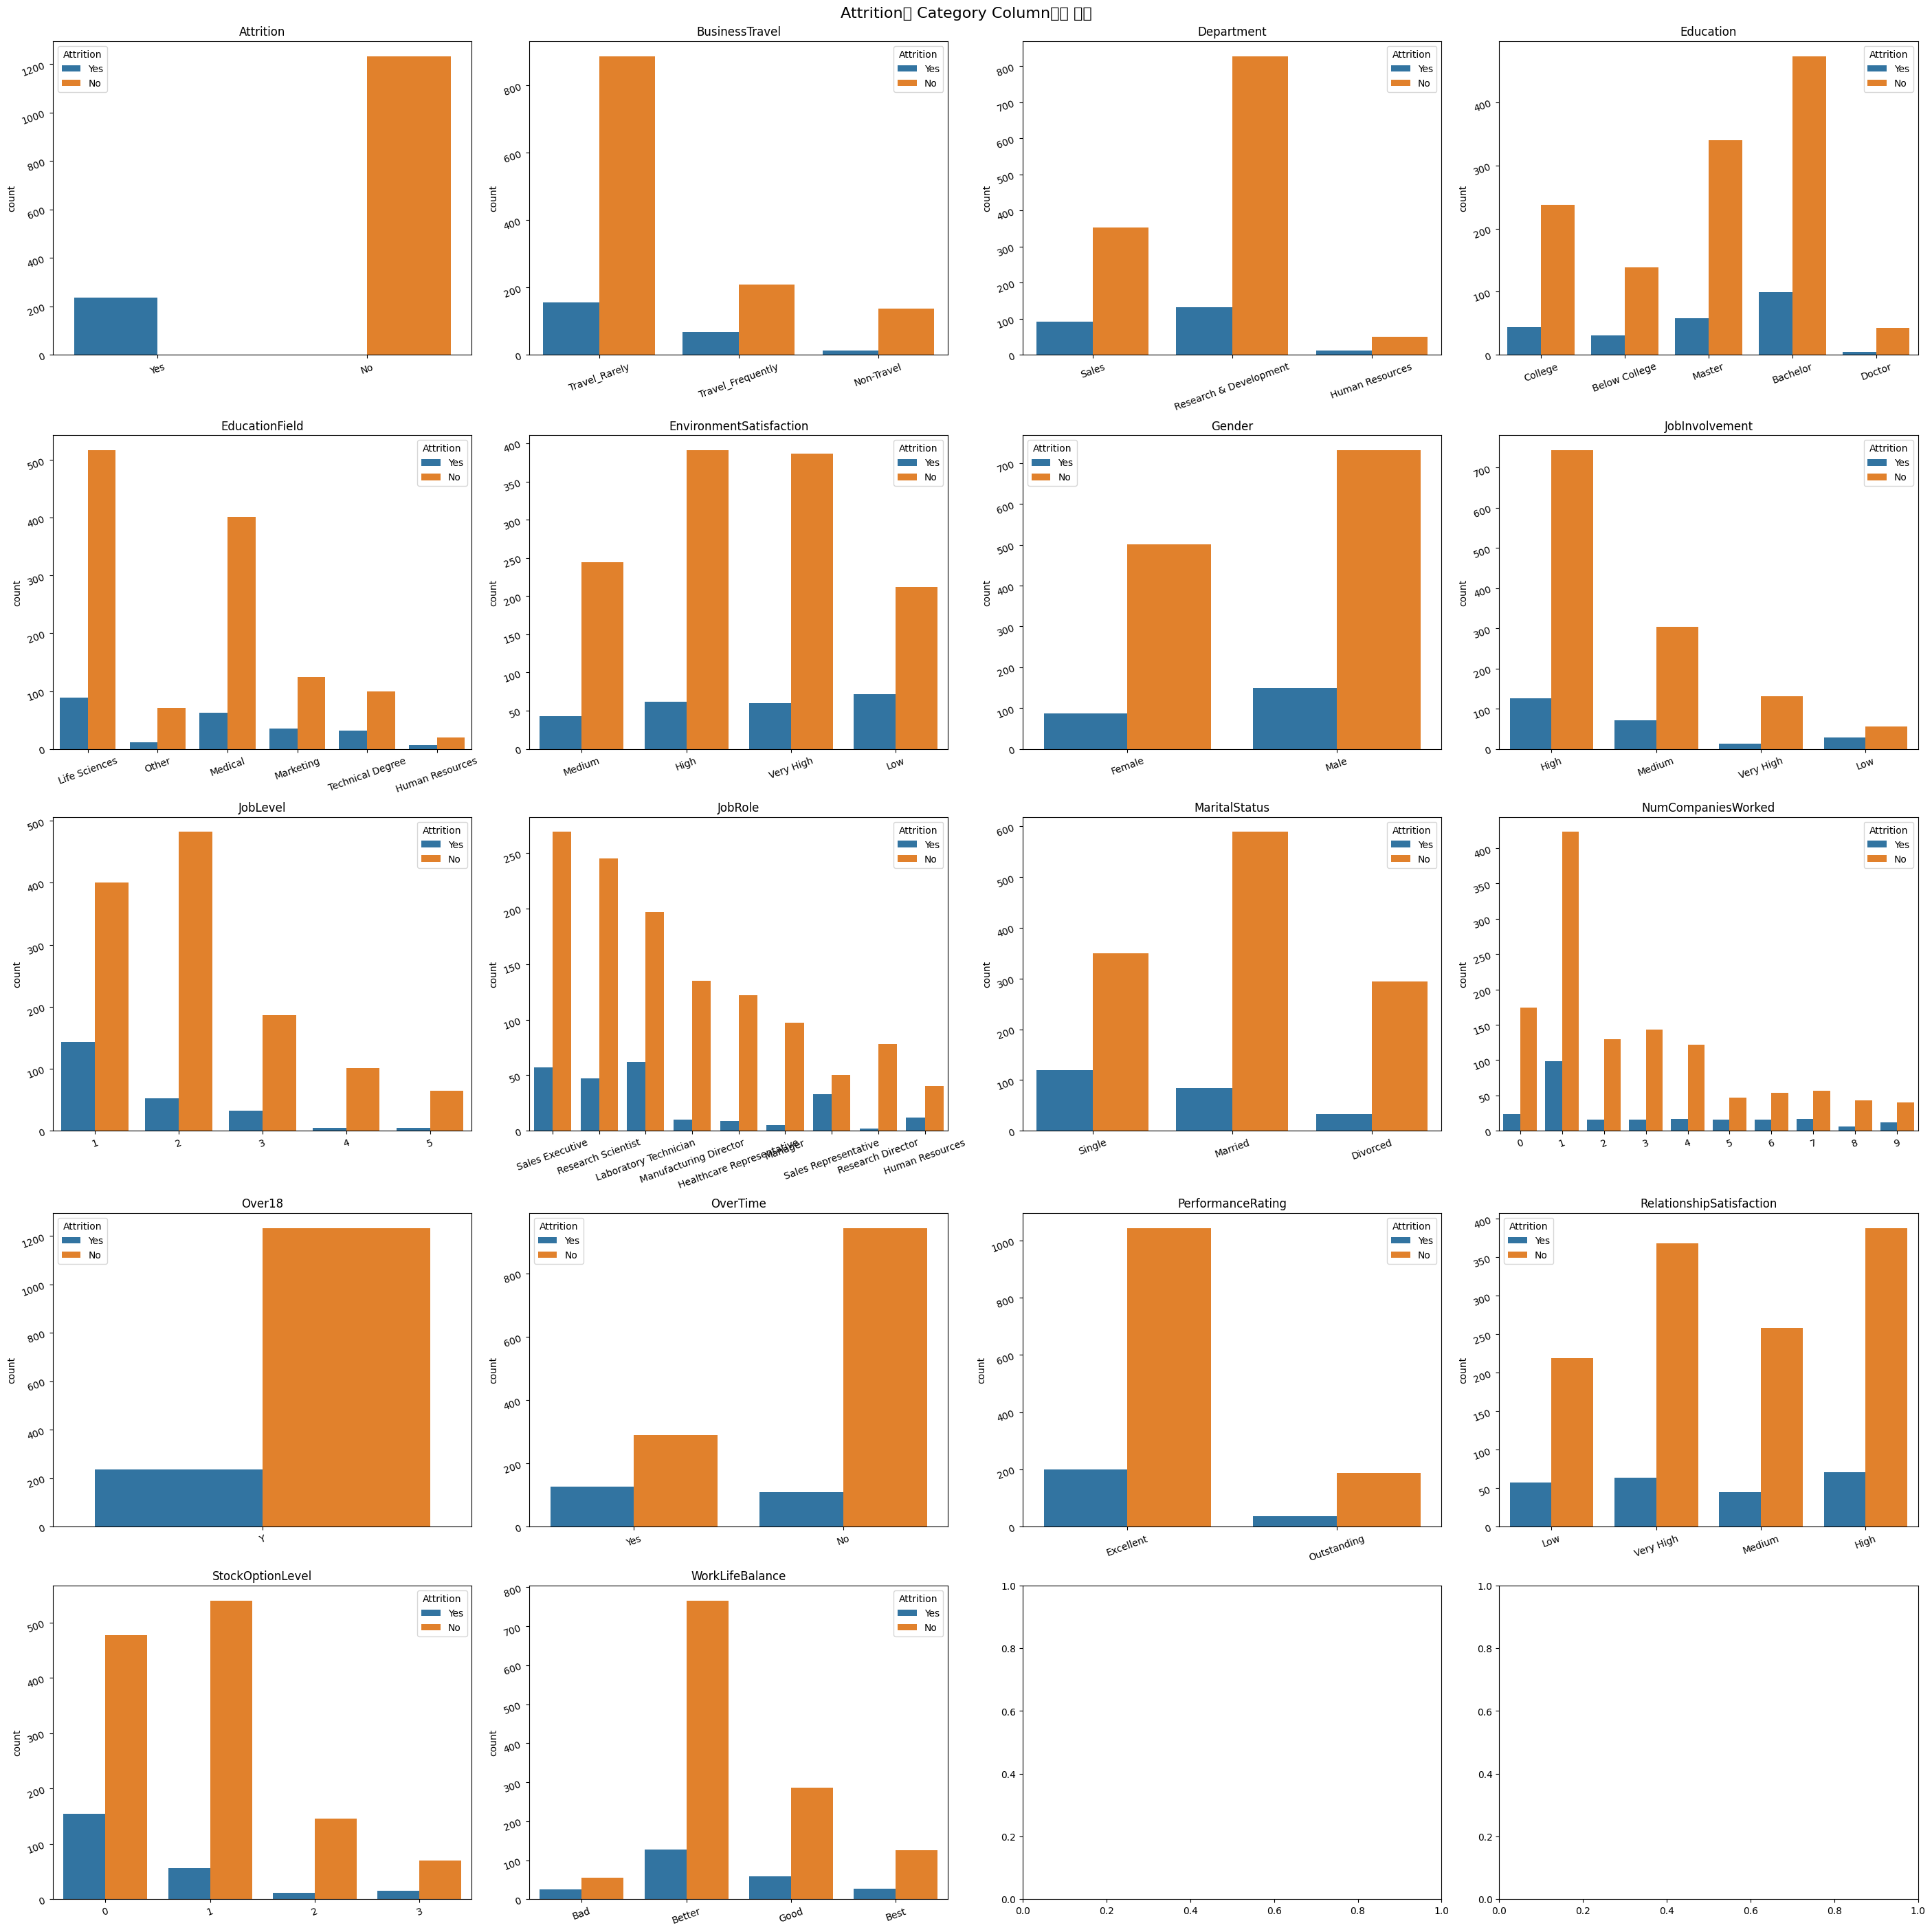

In [ ]:
# category column 그래프로 보기
fig, ax = plt.subplots(5, 4, figsize=(28, 28), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Attrition과 Category Column들의 분포', fontsize=16)

for i in range(len(cate_cols)):
    sns.countplot(x=cate_cols[i], data=data,
                      hue='Attrition', ax=ax[i]).set(xlabel = None)
    ax[i].set(title = cate_cols[i])
    
    if data[cate_cols[1]].nunique() >= 3:
        ax[i].tick_params(labelrotation=20)
        
plt.show()

In [ ]:
# continuous column
cont_cols = []
for column in data.columns:
    if data[column].dtype != object:
        cont_cols.append(column)
        print(f'{column} : {data[column].nunique()}')
        print('==============================')
print()
print(f'연속형 column의 갯수 : {len(cont_cols)} 개')

Age : 43
DailyRate : 886
DistanceFromHome : 29
EmployeeCount : 1
EmployeeNumber : 1470
HourlyRate : 71
JobSatisfaction : 4
MonthlyIncome : 1349
MonthlyRate : 1427
PercentSalaryHike : 15
StandardHours : 1
TotalWorkingYears : 40
TrainingTimesLastYear : 7
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18

연속형 column의 갯수 : 17 개


In [ ]:
# JobSatisfaction
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobSatisfaction': change_dict}, inplace=True)
data['JobSatisfaction'].unique()

array(['Very High', 'Medium', 'High', 'Low'], dtype=object)

In [ ]:
# continuous column
cont_cols = []
for column in data.columns:
    if data[column].dtype != object:
        cont_cols.append(column)
        print(f'{column} : {data[column].nunique()}')
        print('==============================')
print()
print(f'연속형 column의 갯수 : {len(cont_cols)} 개')

Age : 43
DailyRate : 886
DistanceFromHome : 29
EmployeeCount : 1
EmployeeNumber : 1470
HourlyRate : 71
MonthlyIncome : 1349
MonthlyRate : 1427
PercentSalaryHike : 15
StandardHours : 1
TotalWorkingYears : 40
TrainingTimesLastYear : 7
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18

연속형 column의 갯수 : 16 개


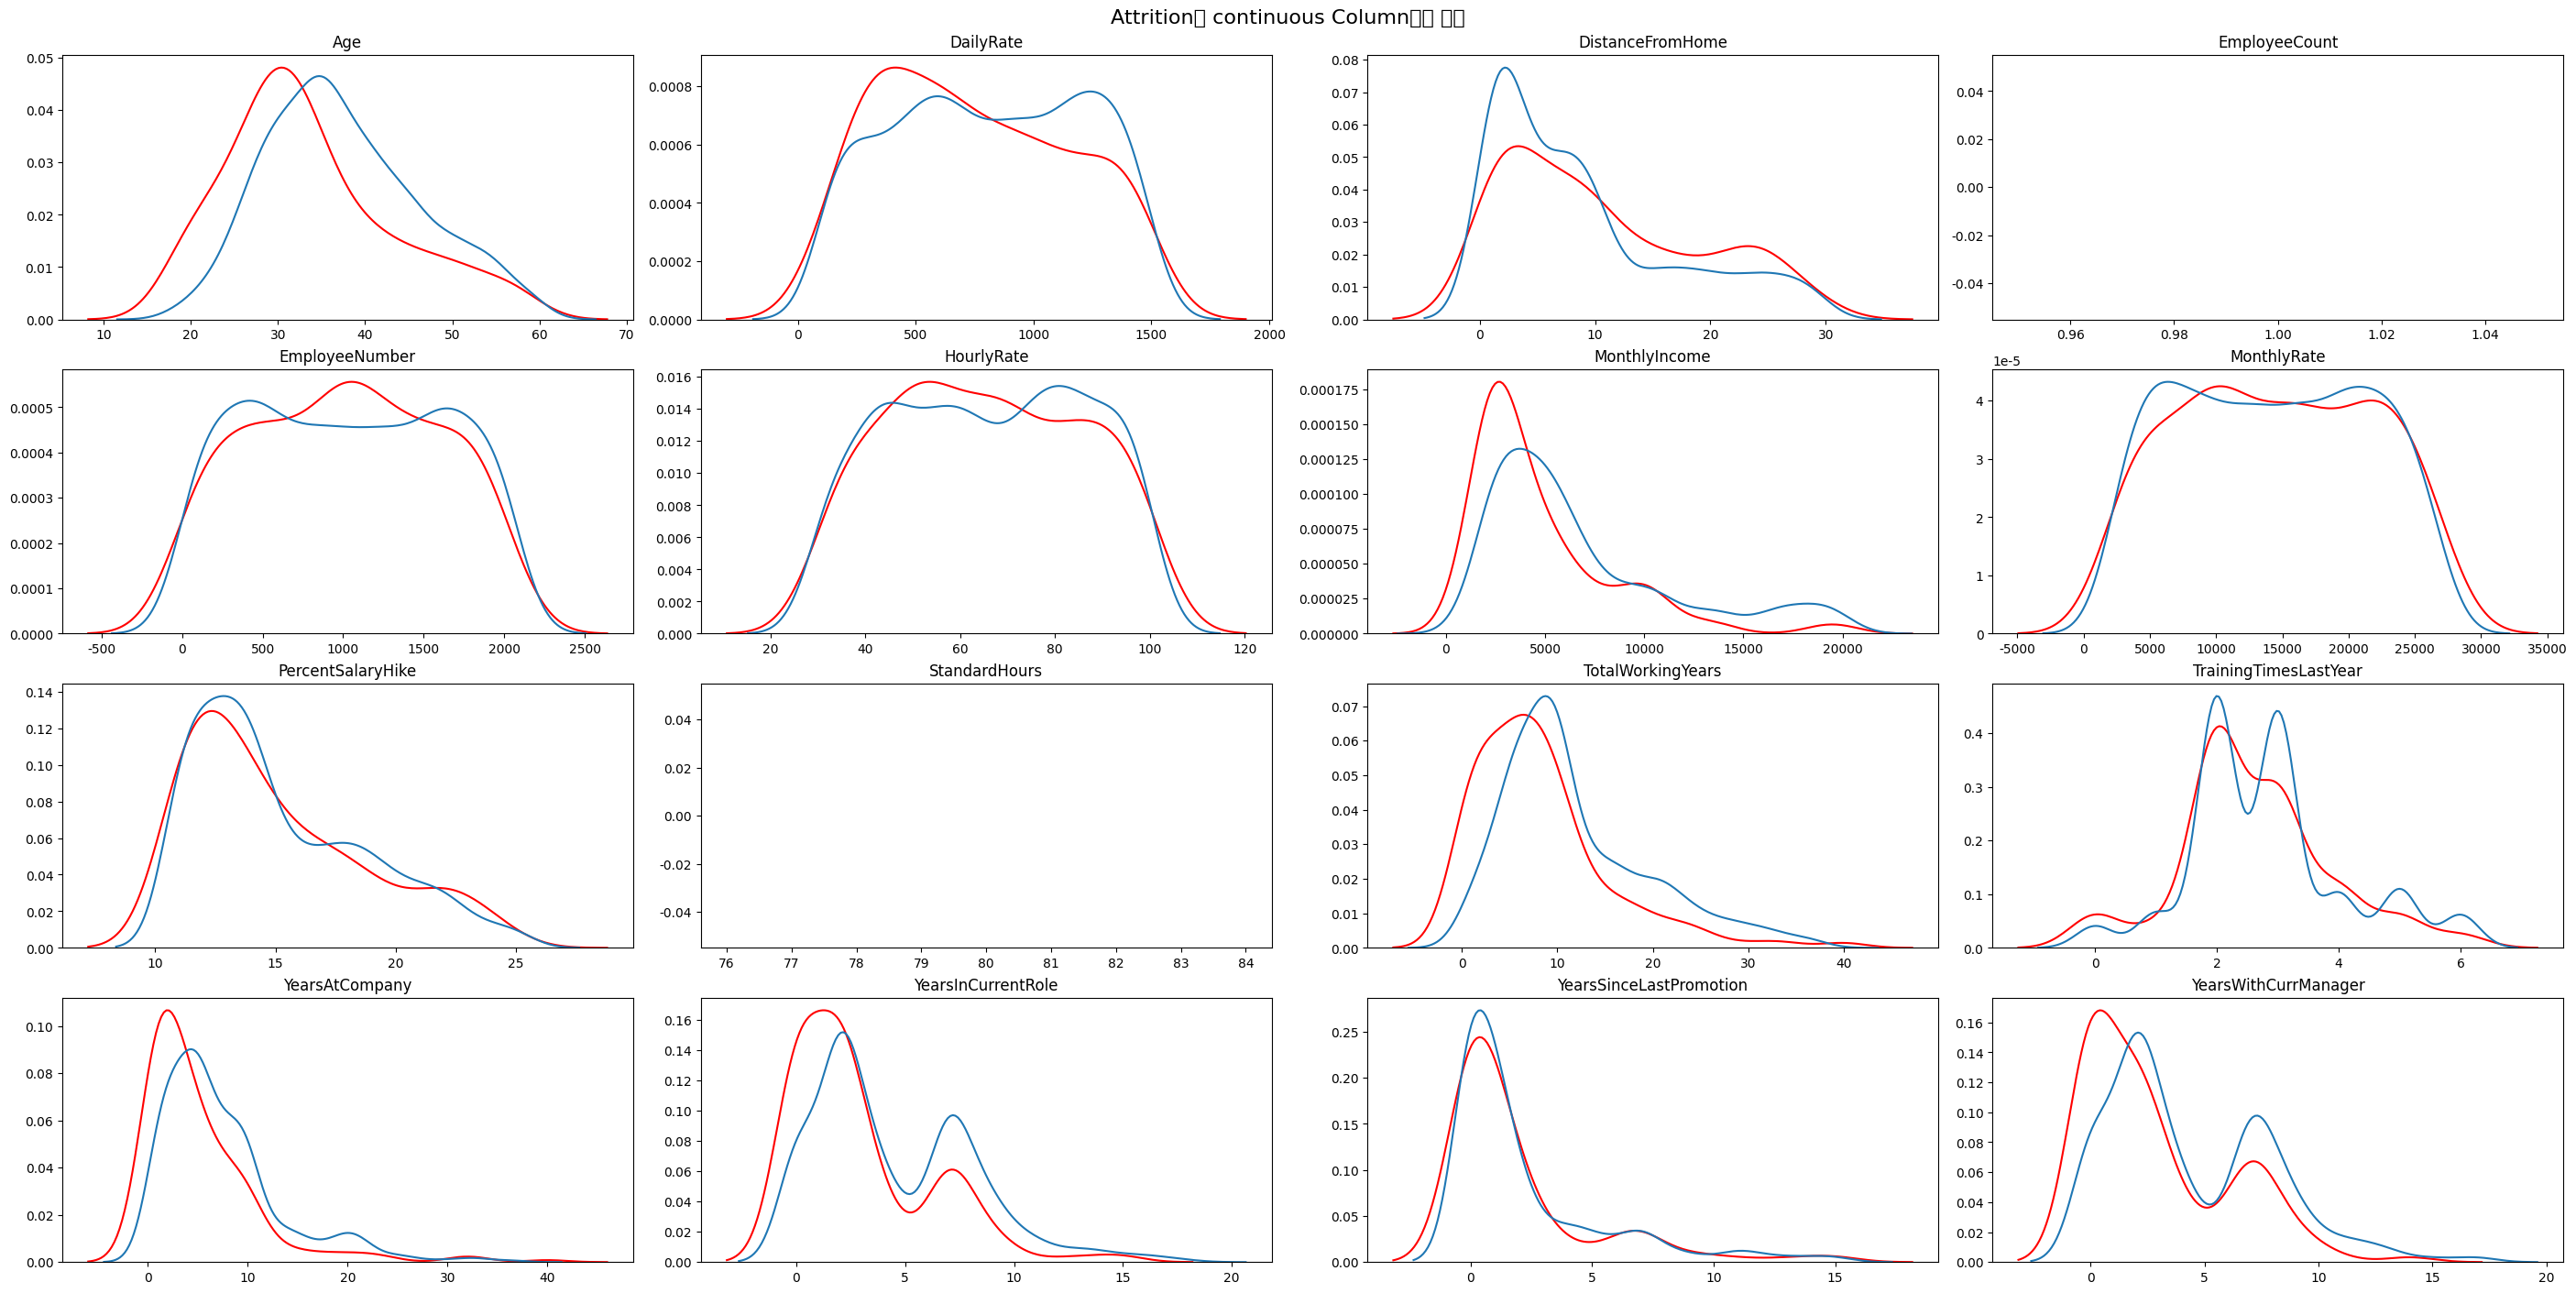

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Attrition과 continuous Column들의 분포', fontsize=16)

for i in range(len(cont_cols)):
    sns.distplot(data[data['Attrition'] == 'Yes'][cont_cols[i]], color='Red', ax=ax[i], hist = False).set(xlabel = None, ylabel = None)
    sns.distplot(data[data['Attrition'] == 'No'][cont_cols[i]], ax=ax[i],hist = False).set(xlabel = None, ylabel = None)
    ax[i].set(title = cont_cols[i])
    
plt.show()

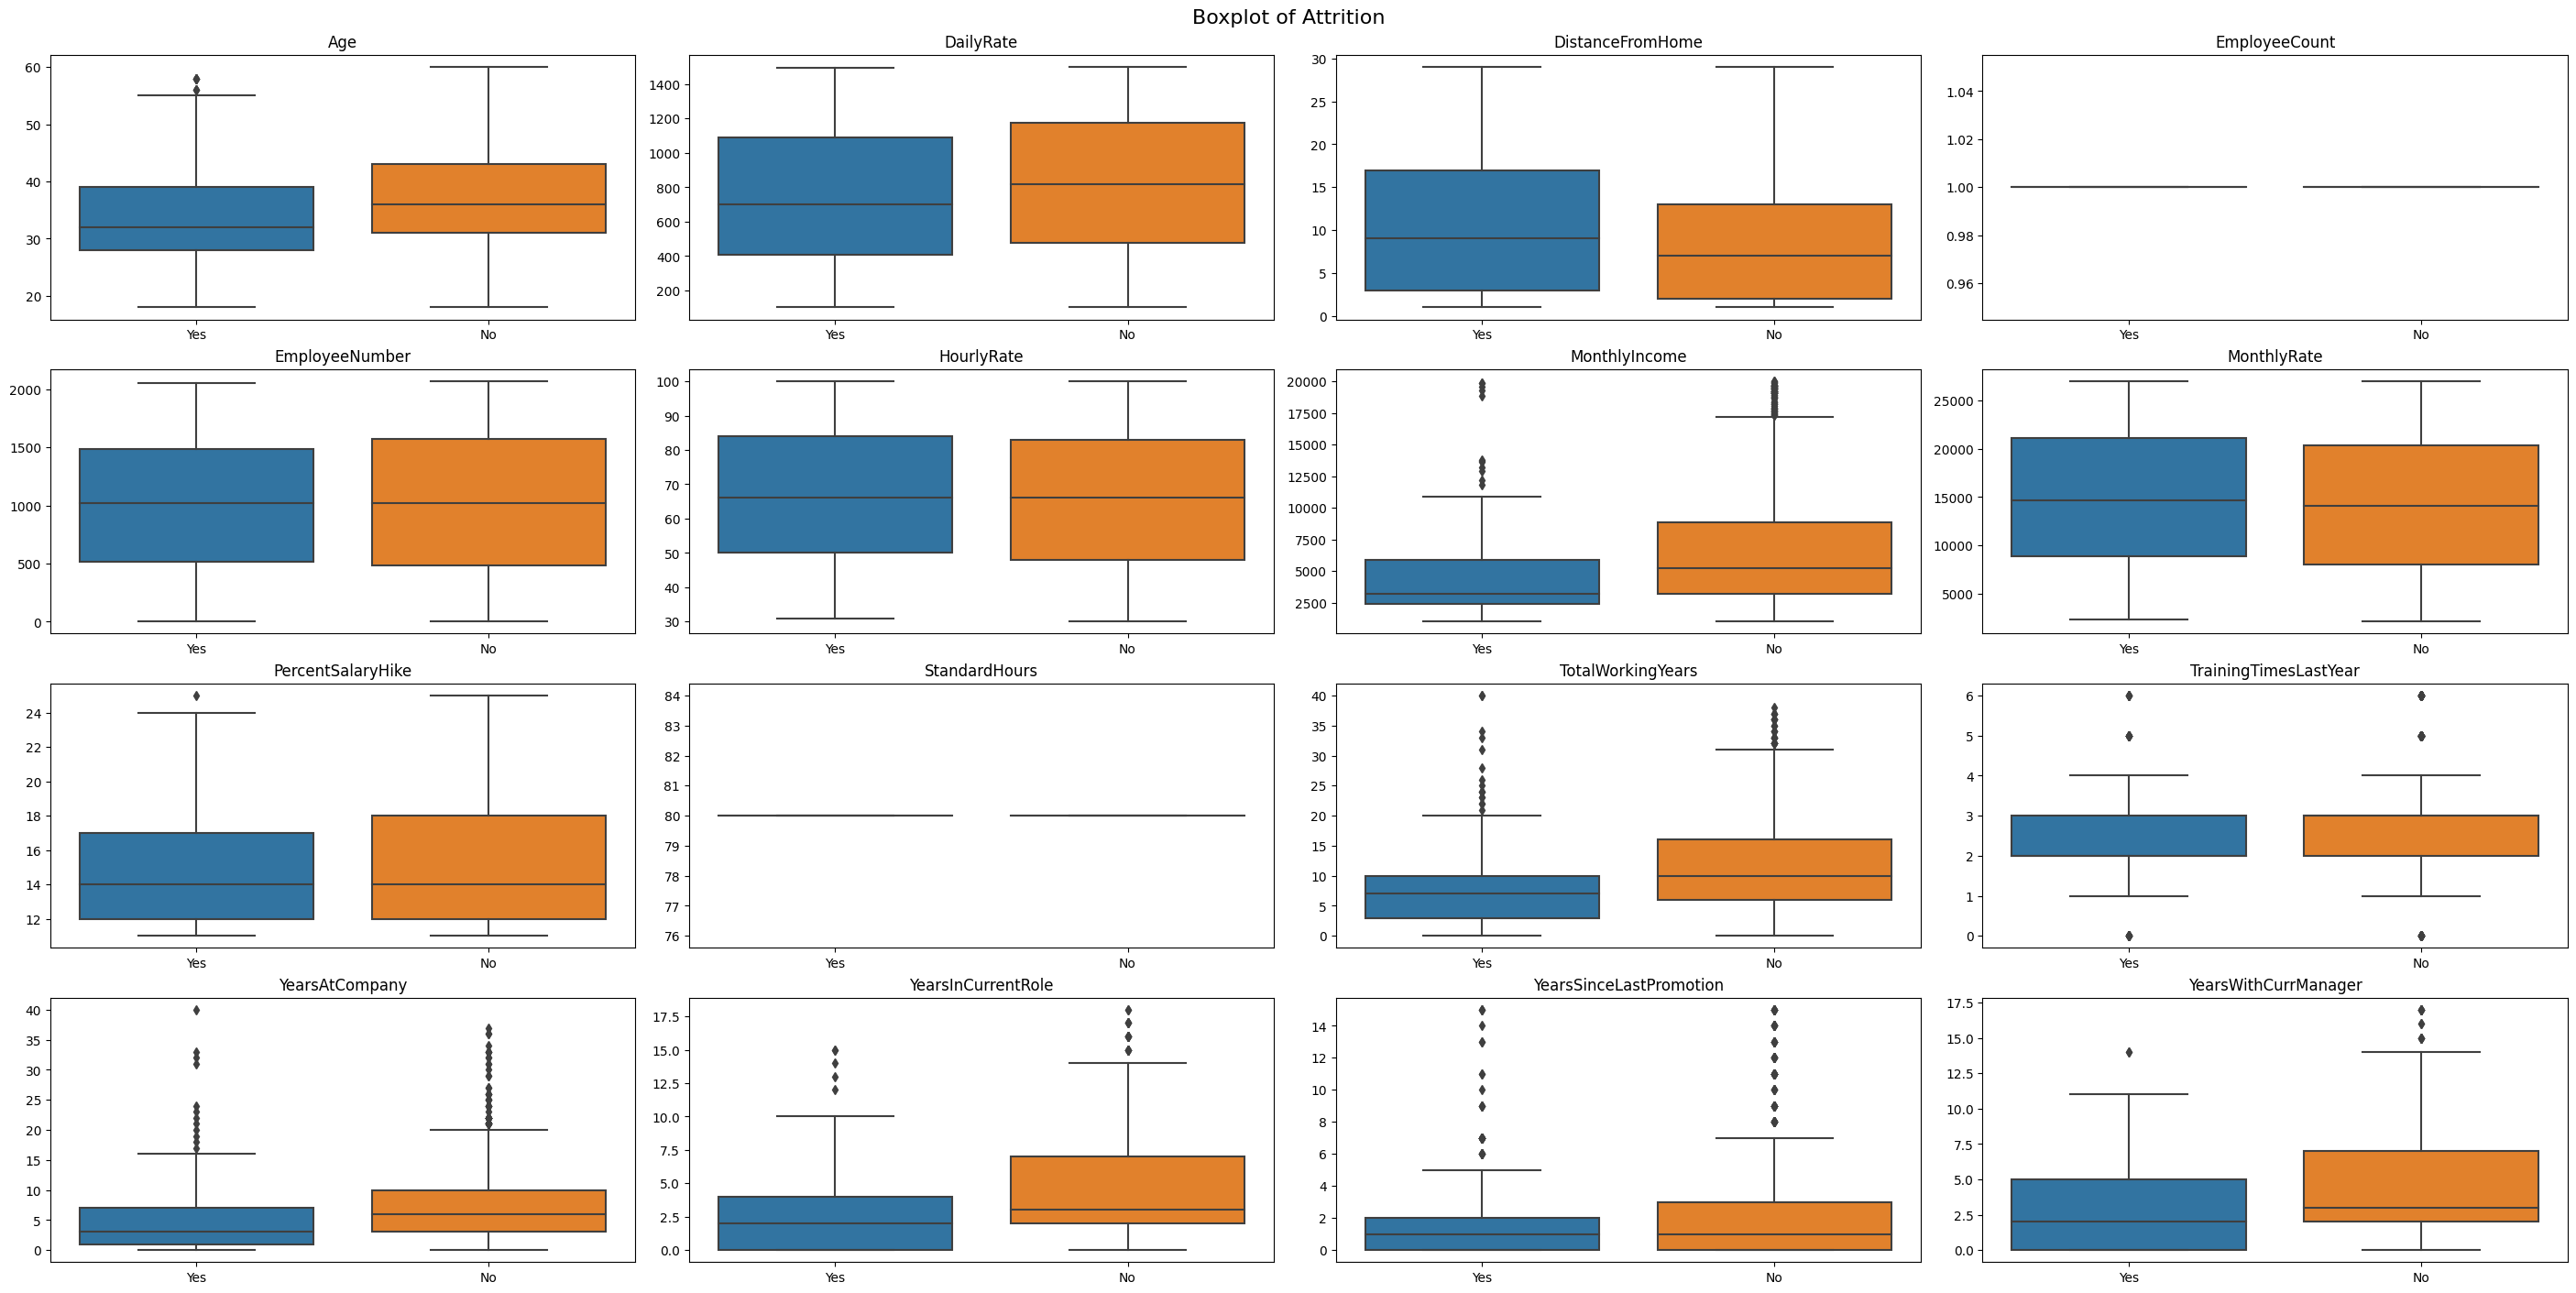

In [ ]:
# boxplot
fig, ax = plt.subplots(4, 4, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=16)

for i in range(len(cont_cols)):
    ax[i].set(title = cont_cols[i])
    sns.boxplot(x=data['Attrition'], y = data[cont_cols[i]], ax=ax[i]).set(xlabel=None,  ylabel=None)
    
plt.show()

In [ ]:
# EmployeeCount, StandardHours, Over18, EmployeeNumber 
print('Over18 :', data['Over18'].unique()[0])
print('EmployeeCount :', data['EmployeeCount'].unique()[0])
print('StandardHours :', data['StandardHours'].unique()[0])
print('EmployeeNumber :', data['EmployeeNumber'].unique()[0])
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)
print(data.shape)
data.tail()

Over18 : Y
EmployeeCount : 1
StandardHours : 80
EmployeeNumber : 1
(1470, 31)


Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
1465                23        College        Medical                    High   
1466                 6  Below College        Medical               Very High   
1467                 4       Bachelor  Life Sciences                  Medium   
1468                 2       Bachelor        Medical               Very High   
1469                 8       Bachelor        Medical                  Medium   

     Gender  HourlyRate JobInvolvement JobLevel                    JobRole  \
1465   Male          41      Very High        2      Laboratory Technician   
1466   Male          42         Medium        3  Healthcare Representative   
1467   Male          87      Very High        2     Manufacturing Director   
1468   Male          63         Medium        2            Sales Executive   
1469   Male          82      Very High        2      Laboratory Technician   

     JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
1465       Very High       Married           2571        12290   
1466             Low       Married           9991        21457   
1467          Medium       Married           6142         5174   
1468          Medium       Married           5390        13243   
1469            High       Married           4404        10228   

     NumCompaniesWorked OverTime  PercentSalaryHike PerformanceRating  \
1465                  4       No                 17         Excellent   
1466                  4       No                 15         Excellent   
1467                  1      Yes                 20       Outstanding   
1468                  2       No                 14         Excellent   
1469                  2       No                 12         Excellent   

     RelationshipSatisfaction StockOptionLevel  TotalWorkingYears  \
1465                     High                1                 17   
1466                      Low                1                  9   
1467                   Medium                1                  6   
1468                Very High                0                 17   
1469                      Low                0                  6   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1465                      3          Better               5   
1466                      5          Better               7   
1467                      0          Better               6   
1468                      3            Good               9   
1469                      3            Best               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2

In [ ]:
# 상관계수 구하기
data_cp = data.copy()
data_cp = pd.get_dummies(data_cp, drop_first= True)
data_cp = data_cp[['Attrition_Yes'] + [column for column in data_cp.columns if column != 'Attrition_Yes']]
data_corr = data_cp.corr()
print(data_corr.shape)

(71, 71)


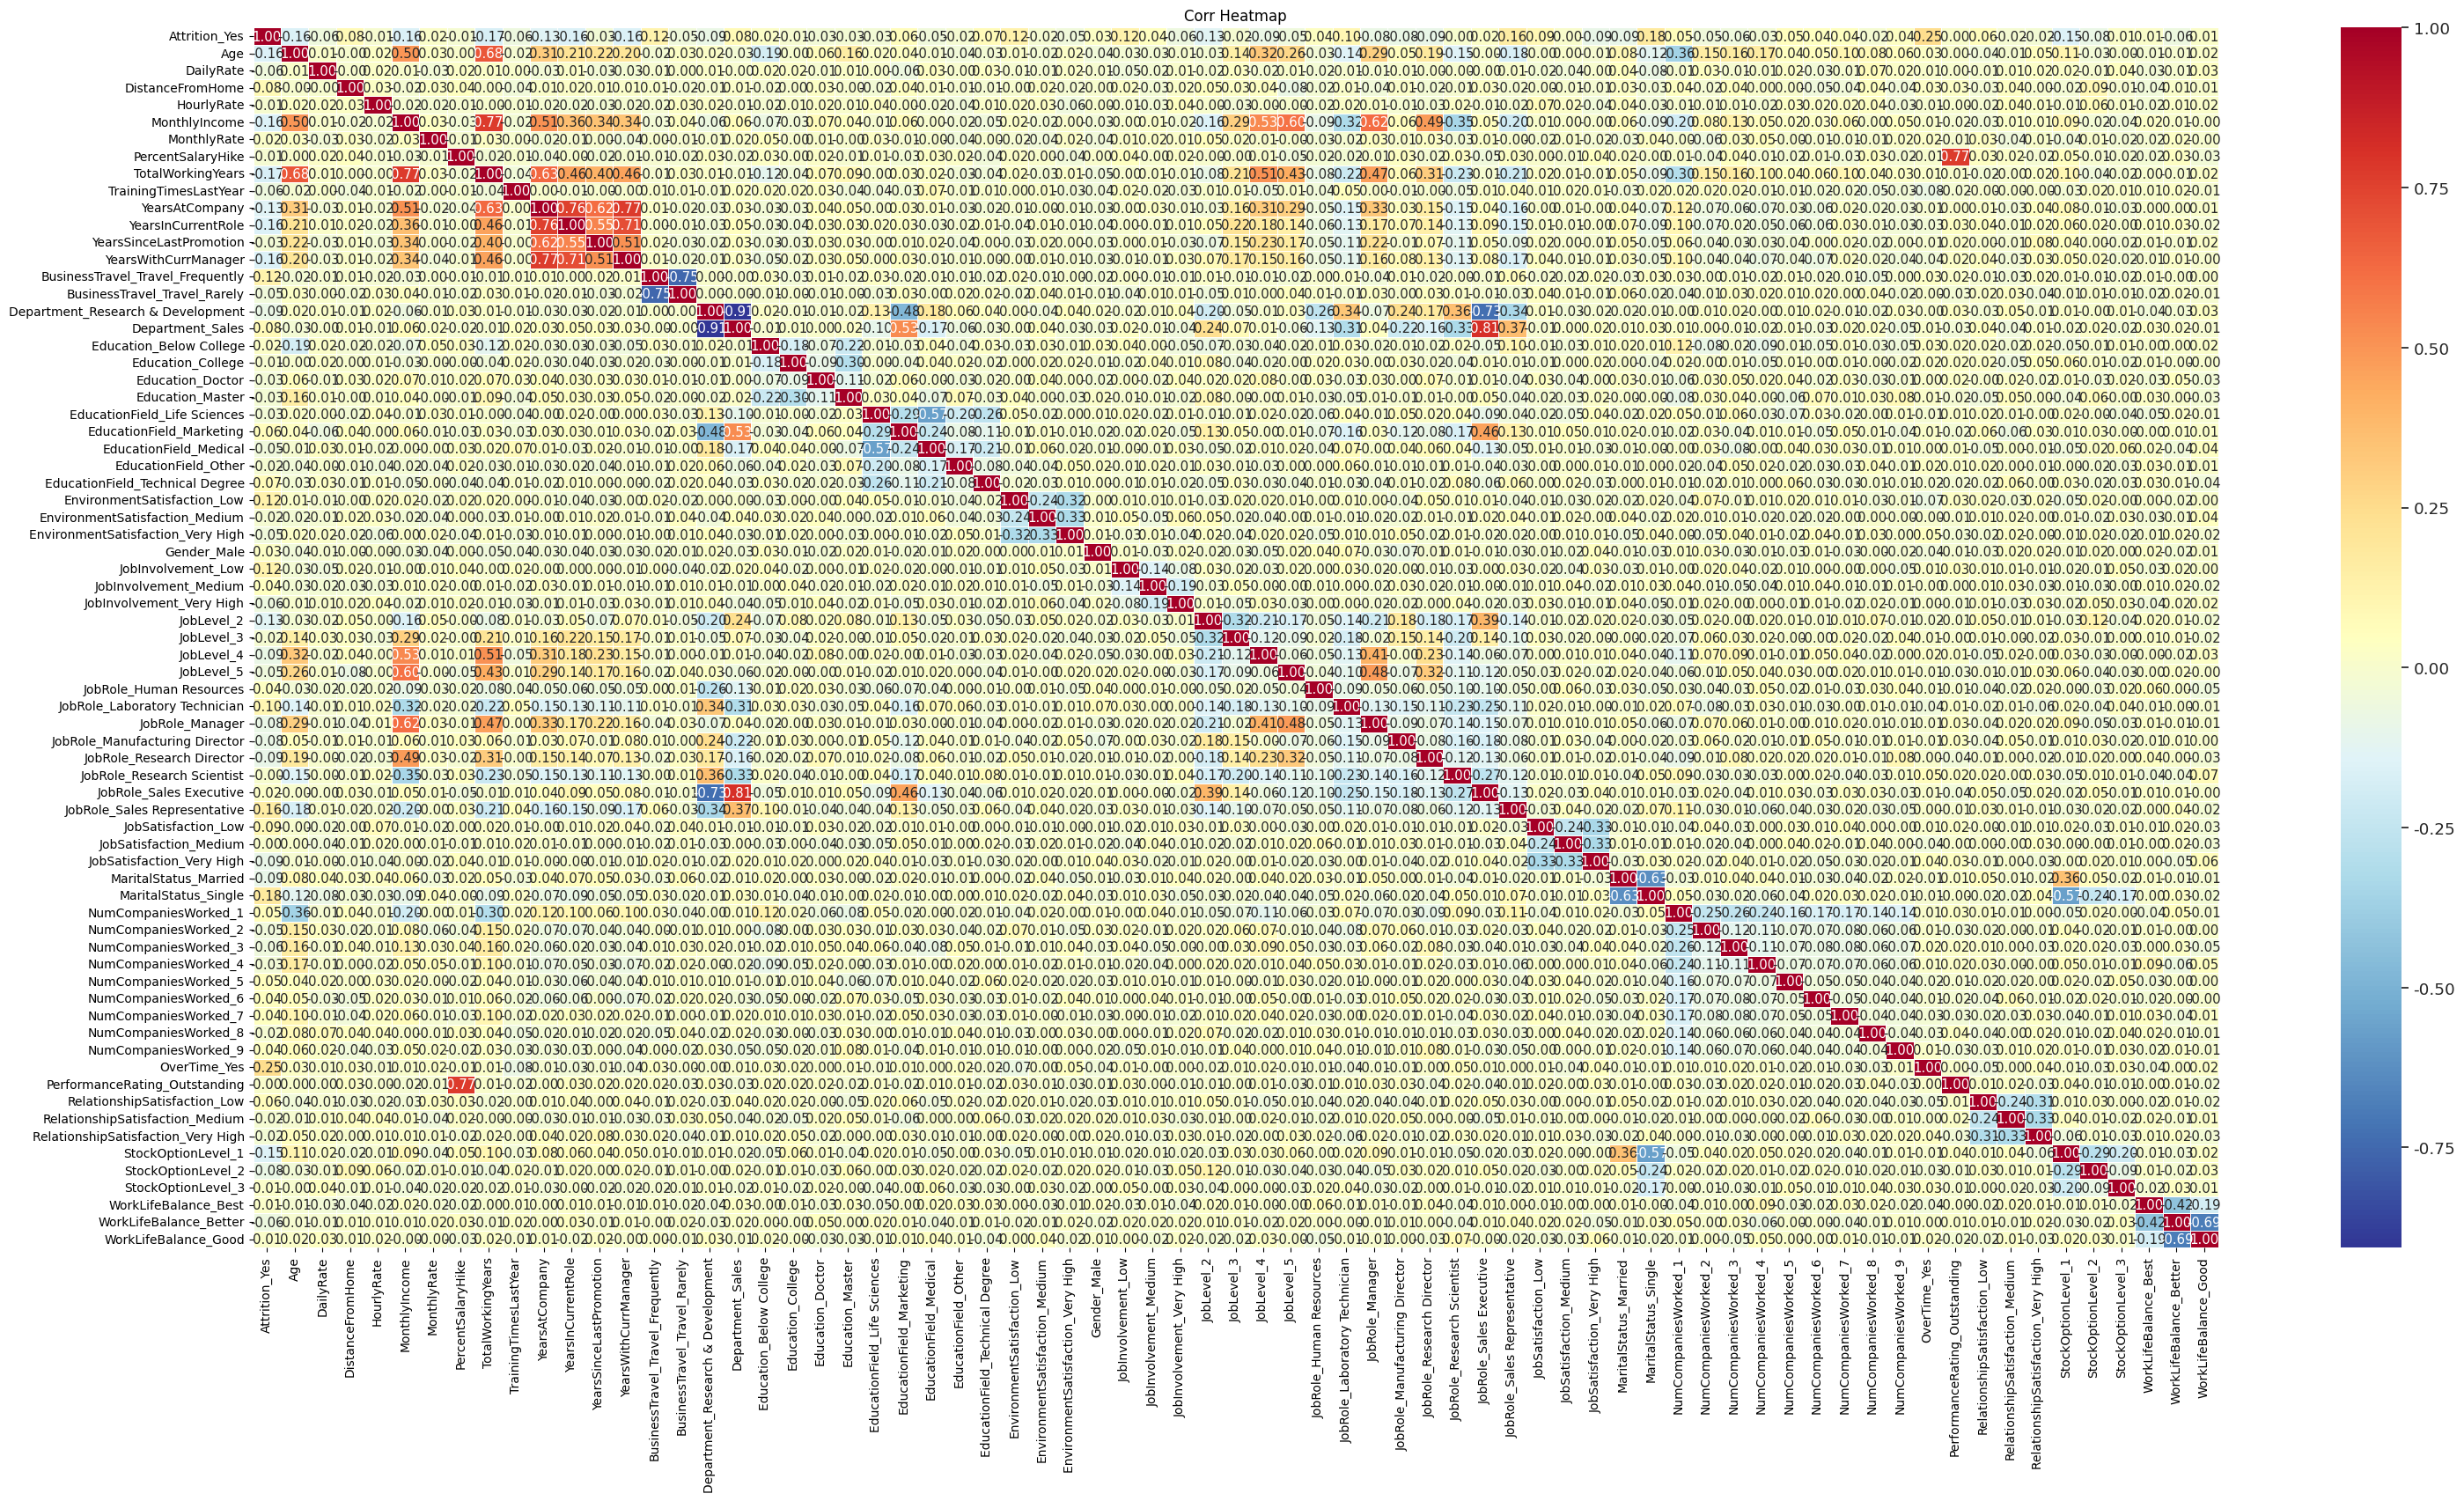

In [ ]:
plt.figure(figsize=(36, 18))
plt.title('Corr Heatmap')

# 실제 히트맵 그리는 코드
sns.set(font_scale=1.2)
sns.heatmap(data_corr, annot=True, annot_kws={
    "size": 90 / np.sqrt(len(data_corr))}, fmt='.2f', cmap='RdYlBu_r', linewidths=0.5,)
plt.savefig('corrmap.png')
plt.show()

In [ ]:
temps = data_corr[(data_corr > 0.4) | (data_corr < -0.4)]
high_corr = []
for c in temps.columns: 
    temp = temps[c].dropna()

    if len(temp) == 1:
        continue
    high_corr.append([temp.name, temp.to_dict()])

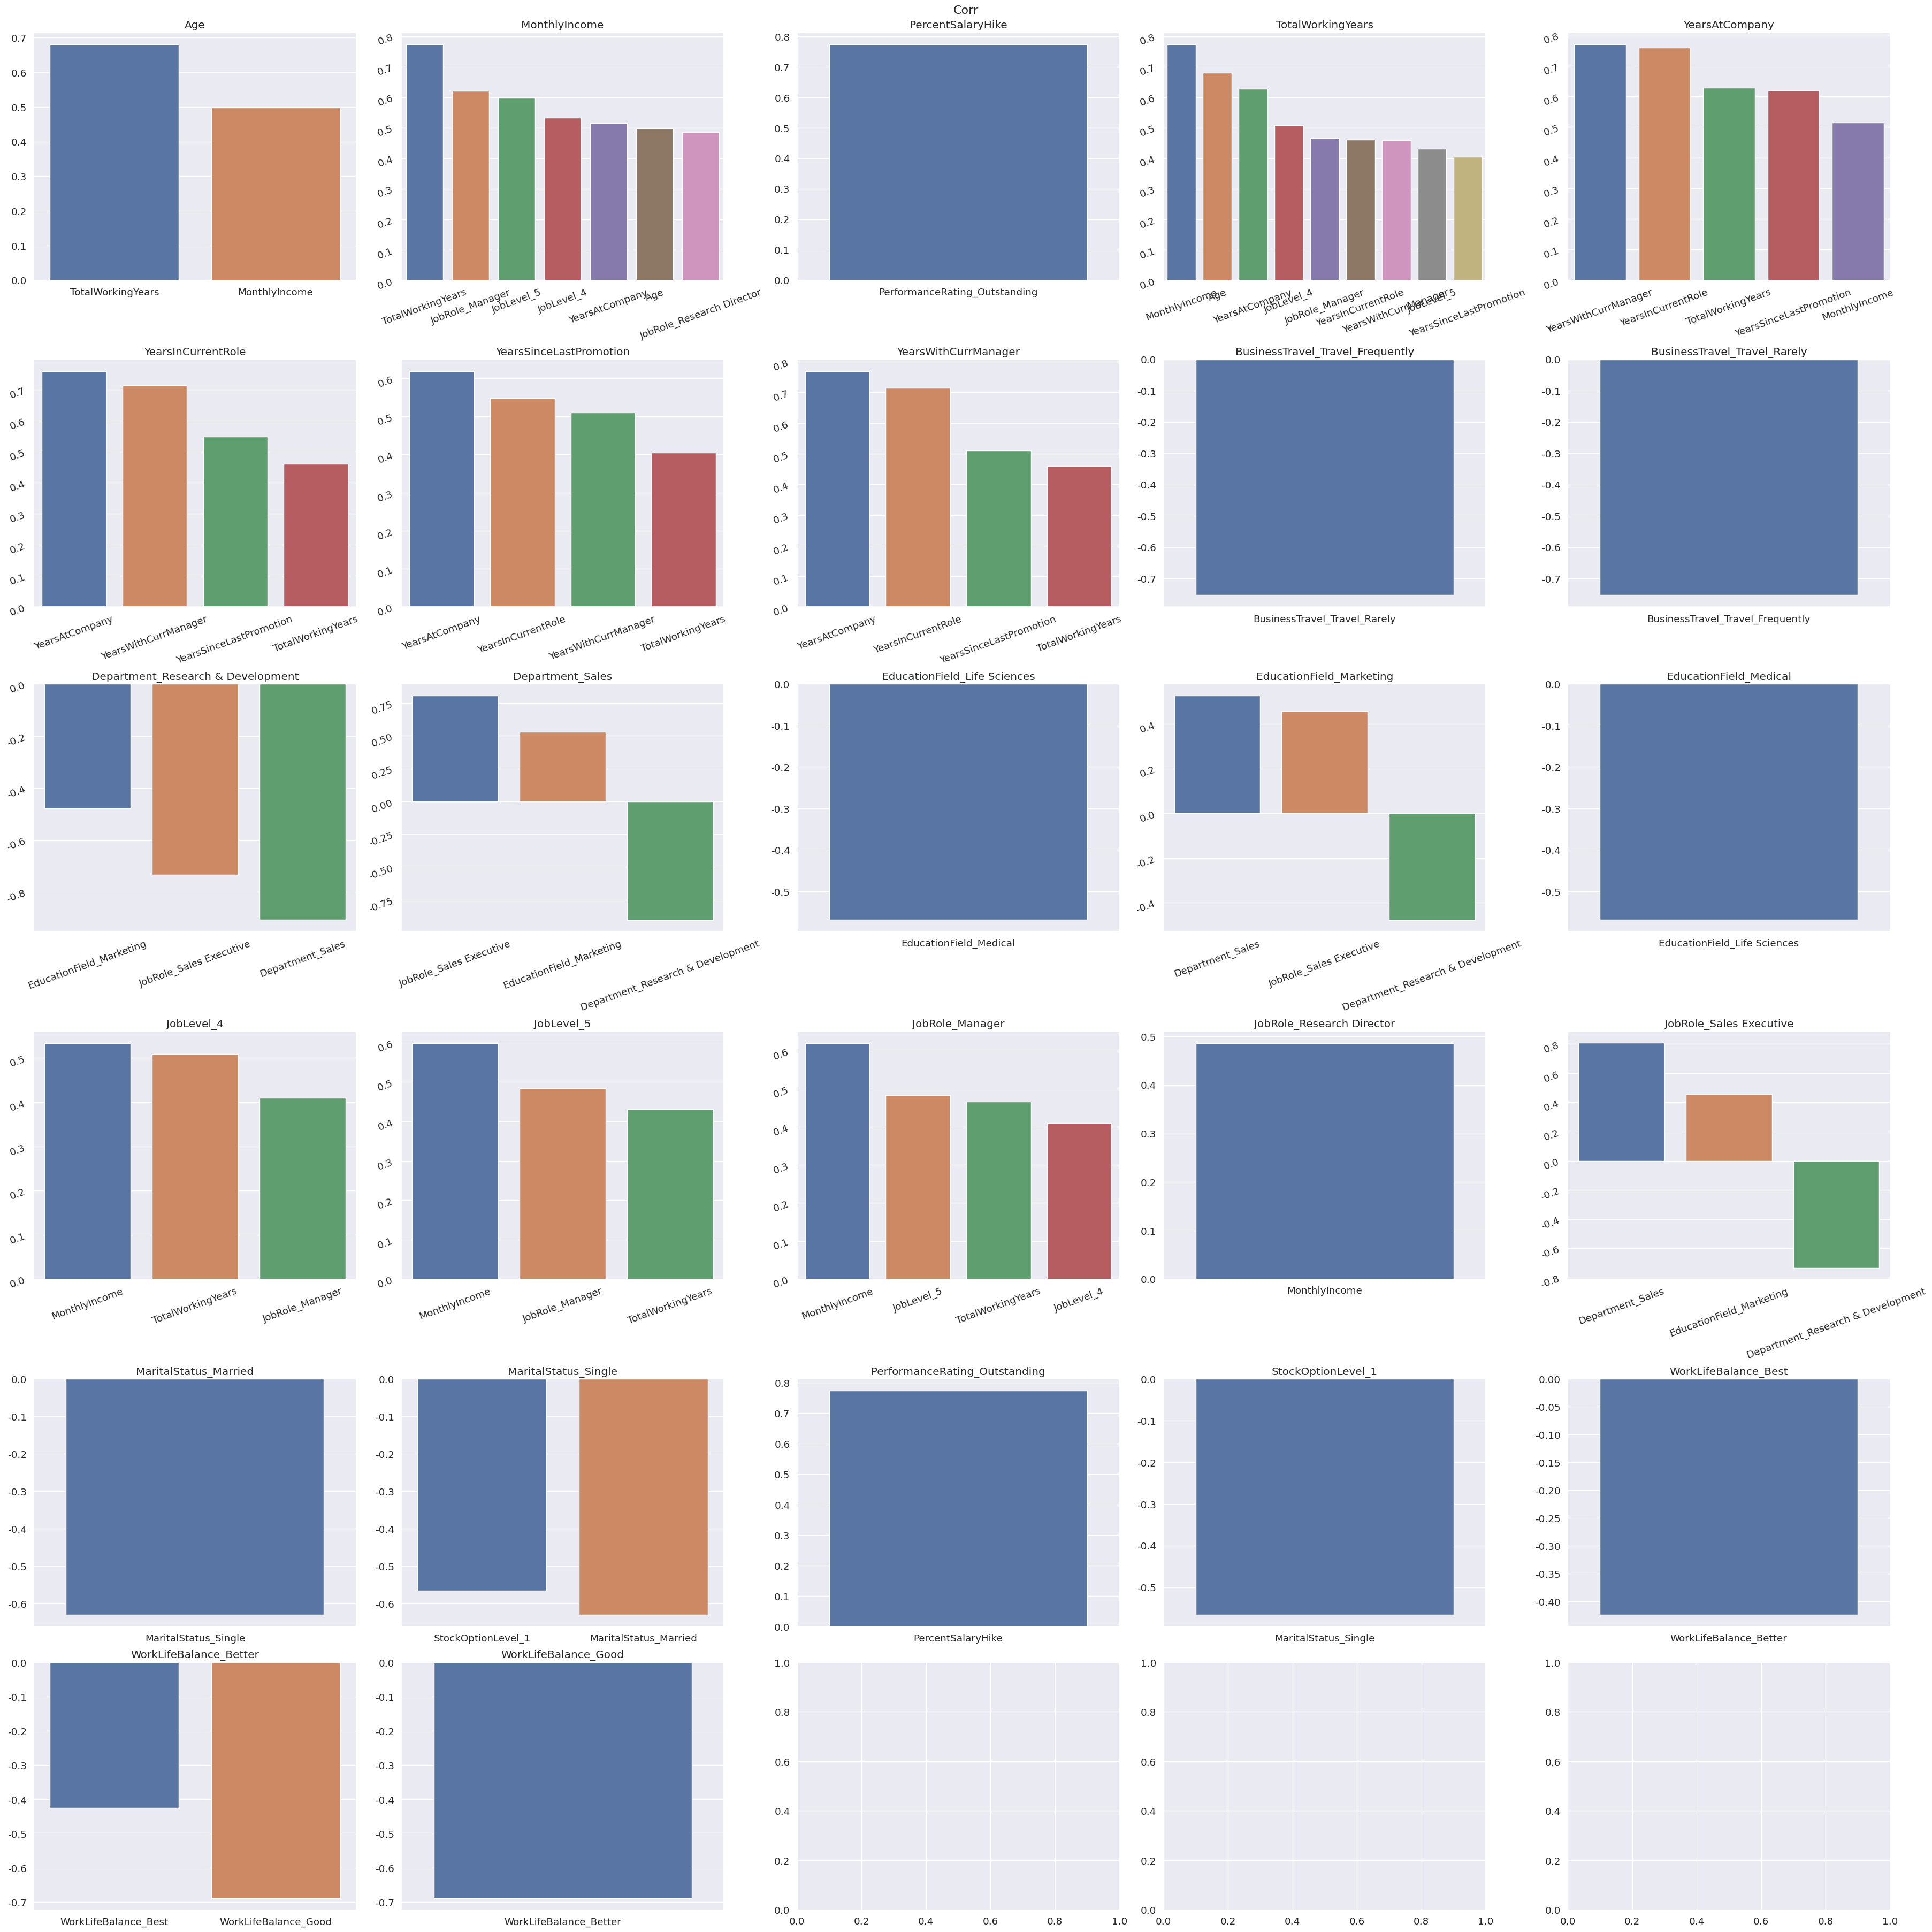

In [ ]:
fig, ax = plt.subplots(6,5, figsize = (36, 36), constrained_layout=True)
fig.suptitle('Corr', fontsize=16)
ax = ax.flatten()

for i, c in enumerate(high_corr):
    ordered_d = OrderedDict(sorted(high_corr[i][1].items(), key=lambda t:t[1], reverse=True))
    title = ordered_d.popitem(0)
    
    sns.barplot(x = list(ordered_d.keys()), y = list(ordered_d.values()), ax = ax[i])
    ax[i].set(title = title[0])
    
    if len(ordered_d.keys()) > 2:
        ax[i].tick_params(labelrotation=20)
plt.savefig('corrbar.png')
plt.show()

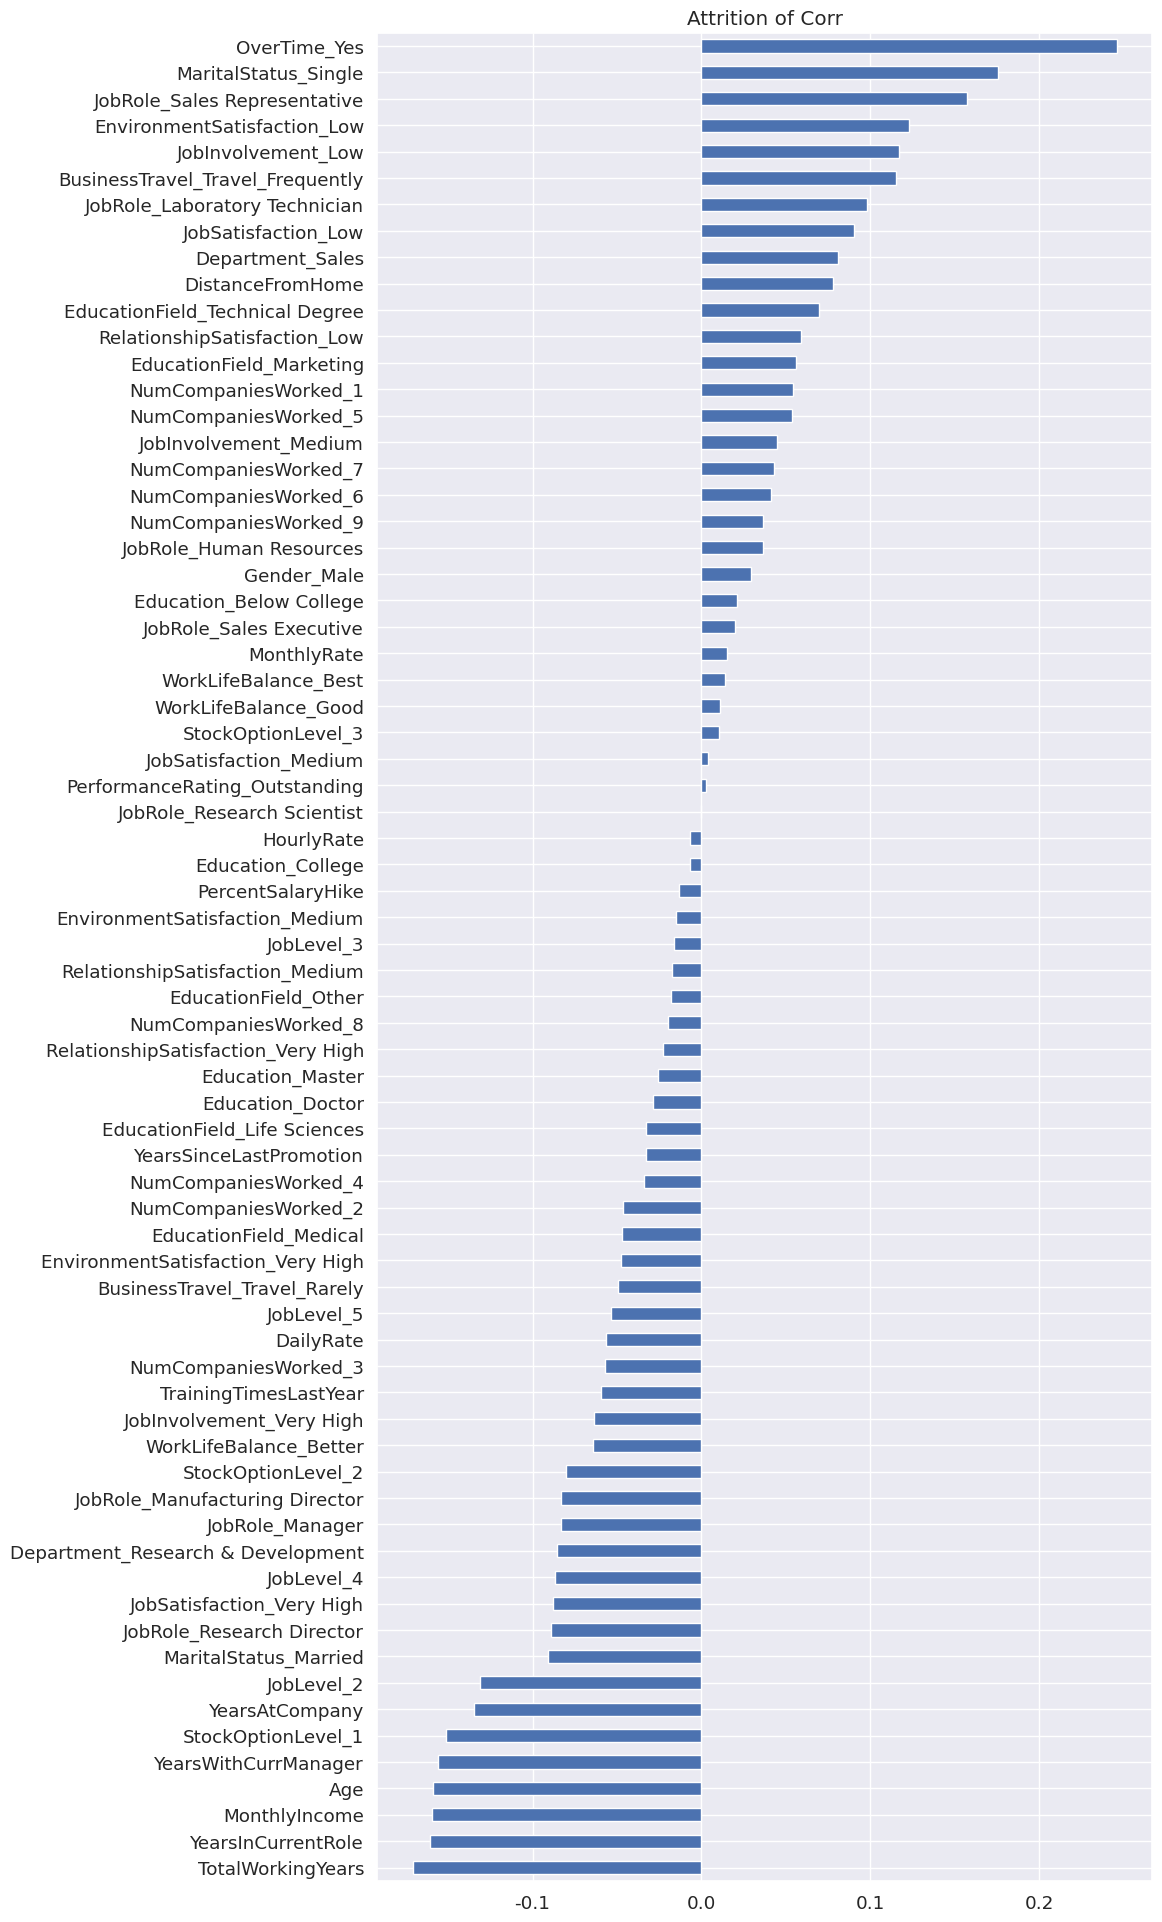

In [ ]:
plt.title('Attrition of Corr')
data_cp.drop('Attrition_Yes', axis = 1).corrwith(data_cp.Attrition_Yes).sort_values().plot(kind='barh', figsize = (10, 24))
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_corr.values, i) for i in range(data_corr.shape[1])]
vif["features"] = data_corr.columns
vif.sort_values(by='VIF Factor', ascending = False)

VIF Factor                            features
17  13640.716455                    Department_Sales
16  13522.448575   Department_Research & Development
22   3238.702786        EducationField_Life Sciences
5    3212.315104                       MonthlyIncome
24   2882.516493              EducationField_Medical
23   1749.979398            EducationField_Marketing
44   1229.895130             JobRole_Sales Executive
26    816.753726     EducationField_Technical Degree
37    740.090127                          JobLevel_5
36    721.256599                          JobLevel_4
38    580.597267             JobRole_Human Resources
25    503.944369                EducationField_Other
35    344.522261                          JobLevel_3
45    249.398879        JobRole_Sales Representative
8     235.109044                   TotalWorkingYears
40    196.264859                     JobRole_Manager
34    162.649949                          JobLevel_2
10    161.956363                      YearsAtCompany
43    107.302581          JobRole_Research Scientist
39     91.089185       JobRole_Laboratory Technician
69     88.607126              WorkLifeBalance_Better
50     73.095522                MaritalStatus_Single
70     65.434059                WorkLifeBalance_Good
42     53.287587           JobRole_Research Director
11     40.420495                  YearsInCurrentRole
65     38.927425                  StockOptionLevel_1
13     37.935563                YearsWithCurrManager
68     29.813928                WorkLifeBalance_Best
51     21.270629                NumCompaniesWorked_1
1      20.328417                                 Age
7      19.126971                   PercentSalaryHike
61     18.554877       PerformanceRating_Outstanding
41     16.536042      JobRole_Manufacturing Director
15     15.969357        BusinessTravel_Travel_Rarely
14     15.703952    BusinessTravel_Travel_Frequently
53     14.656369                NumCompaniesWorked_3
66     14.637033                  StockOptionLevel_2
52     12.851189                NumCompaniesWorked_2
49     12.089123               MaritalStatus_Married
54     12.066410                NumCompaniesWorked_4
12     10.986051             YearsSinceLastPromotion
67      8.399376                  StockOptionLevel_3
56      6.210026                NumCompaniesWorked_6
57      6.093062                NumCompaniesWorked_7
55      5.382364                NumCompaniesWorked_5
59      4.785775                NumCompaniesWorked_9
0       4.706463                       Attrition_Yes
58      4.495559                NumCompaniesWorked_8
48      3.975349           JobSatisfaction_Very High
64      3.799682  RelationshipSatisfaction_Very High
21      3.694006                    Education_Master
29      3.634595   EnvironmentSatisfaction_Very High
62      3.628168        RelationshipSatisfaction_Low
46      3.556749                 JobSatisfaction_Low
27      3.444139         EnvironmentSatisfaction_Low
47      3.402401              JobSatisfaction_Medium
28      3.310664      EnvironmentSatisfaction_Medium
63      3.220096     RelationshipSatisfaction_Medium
19      3.059469                   Education_College
18      2.625621             Education_Below College
60      1.823511                        OverTime_Yes
31      1.796165                  JobInvolvement_Low
33      1.726490            JobInvolvement_Very High
20      1.706147                    Education_Doctor
32      1.687609               JobInvolvement_Medium
3       1.580221                    DistanceFromHome
2       1.447858                           DailyRate
6       1.379119                         MonthlyRate
4       1.349891                          HourlyRate
30      1.328611                         Gender_Male
9       1.318633               TrainingTimesLastYear

In [ ]:
def make_pivot(data, x, y, func):
    table = pd.pivot_table(data = data, values = 'Age', index = x, columns= y, aggfunc=func)
    table['total'] = table['No'] + table['Yes']
    table['Attrition_rate'] = table['Yes'] / table['total'] * 100
    return table

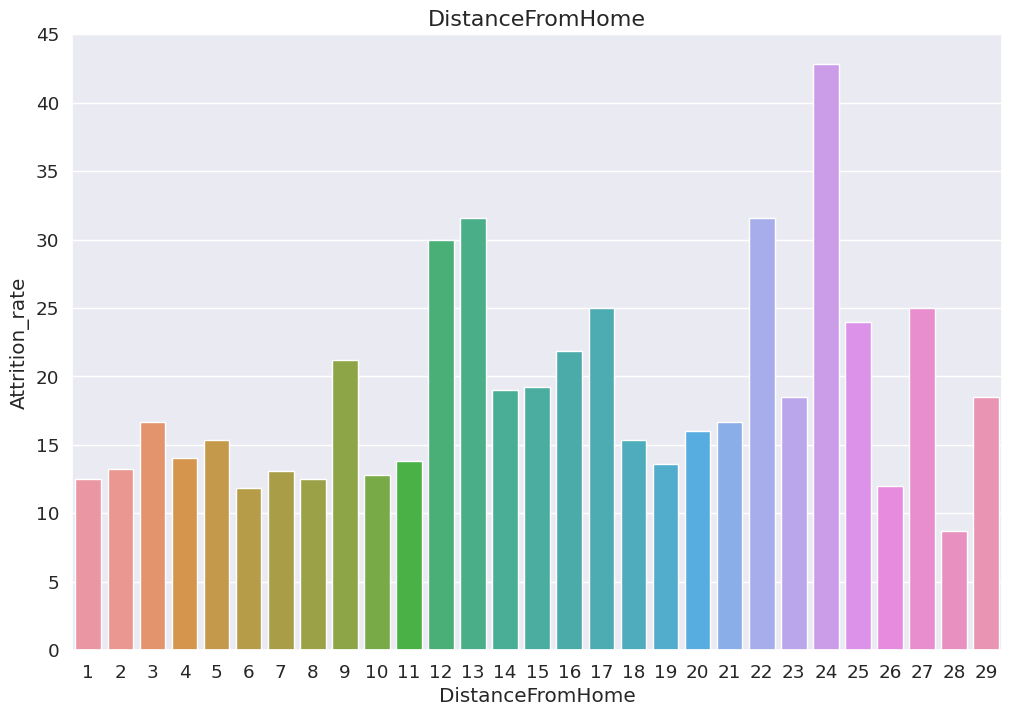

In [ ]:
rate = make_pivot(data, 'DistanceFromHome', 'Attrition', func=len)

plt.figure(figsize=(12,8))
plt.title('DistanceFromHome', fontsize=16)
sns.barplot(x=rate.index, y=rate['Attrition_rate'])
plt.show()

In [ ]:
round(data[data.DistanceFromHome >= 22]['DistanceFromHome'].count() / len(data),2)


0.13

In [ ]:
data['FarFromHome'] = np.where(data.DistanceFromHome >= 22 , 1, 0)
data['FarFromHome'] = data['FarFromHome'].astype(object)

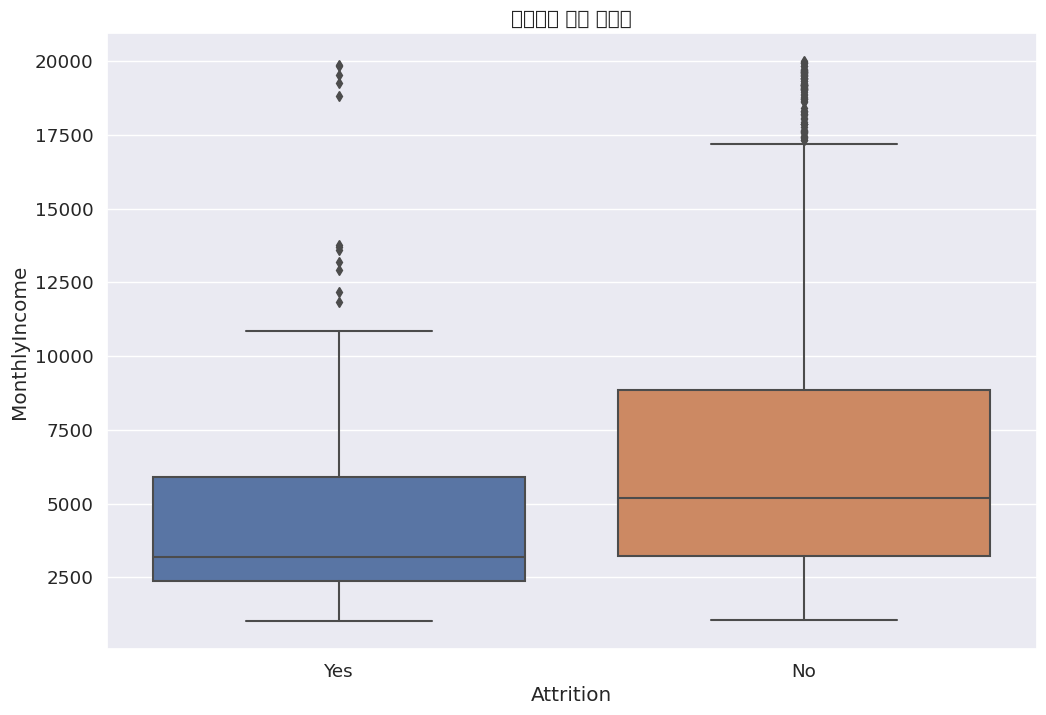

In [ ]:
plt.figure(figsize = (12,8))
plt.title('월급여에 따른 퇴사율')
sns.boxplot(x = 'Attrition', y = 'MonthlyIncome', data = data)
plt.show()

In [ ]:
data[data['Attrition'] == 'Yes']['MonthlyIncome'].median()

3202.0

In [ ]:
data['LowMonthlyIncome'] = np.where(data.MonthlyIncome <= 3202 , 1, 0)
data['LowMonthlyIncome'] = data['LowMonthlyIncome'].astype(object)

TypeError: ignored

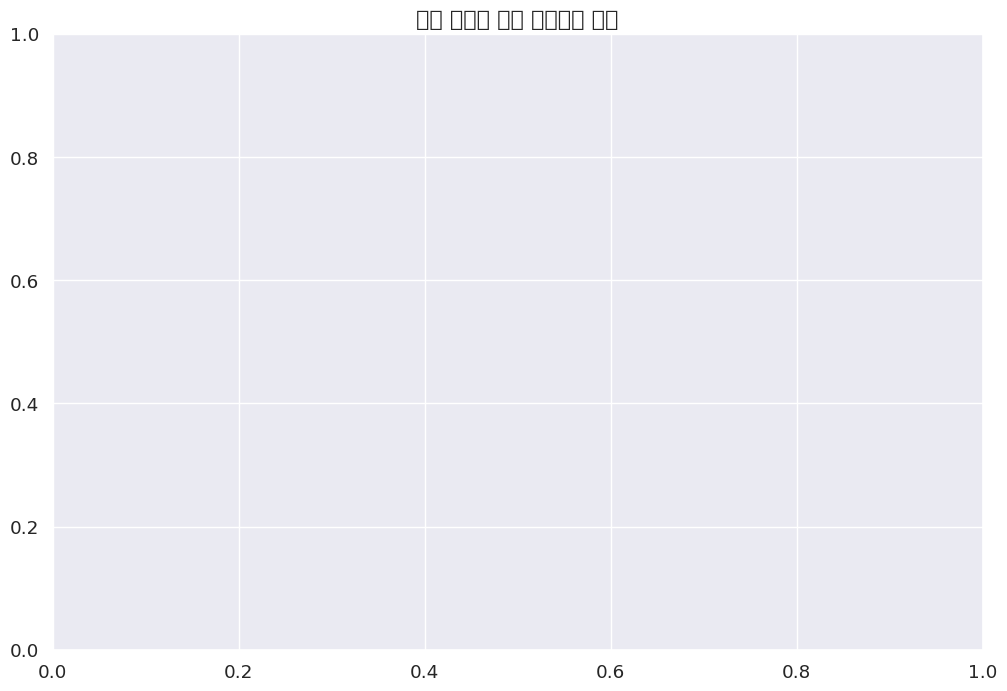

In [ ]:
rate = make_pivot(data, 'JobInvolvement', 'Attrition', func=len)

plt.figure(figsize=(12, 8))
plt.title('업무 환경에 따른 퇴사인원 비율', fontsize=16)
sns.barplot(rate.index, rate.Attrition_rate, order=['Low', 'Medium', 'High', 'Very High'])
plt.show()

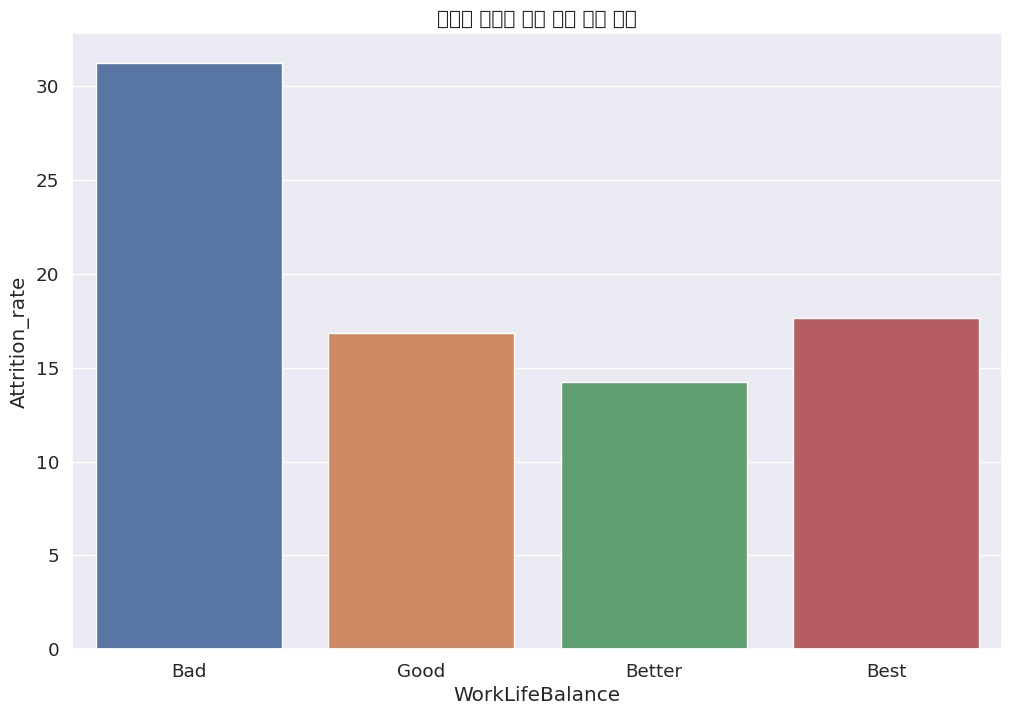

In [ ]:
rate = make_pivot(data, 'WorkLifeBalance', 'Attrition', func= len)

plt.figure(figsize = (12,8))
plt.title('워라벨 정도에 따른 퇴사 인원 비율')
sns.barplot(x=rate.index, y='Attrition_rate', data=rate, order=['Bad', 'Good', 'Better', 'Best'])
plt.show()

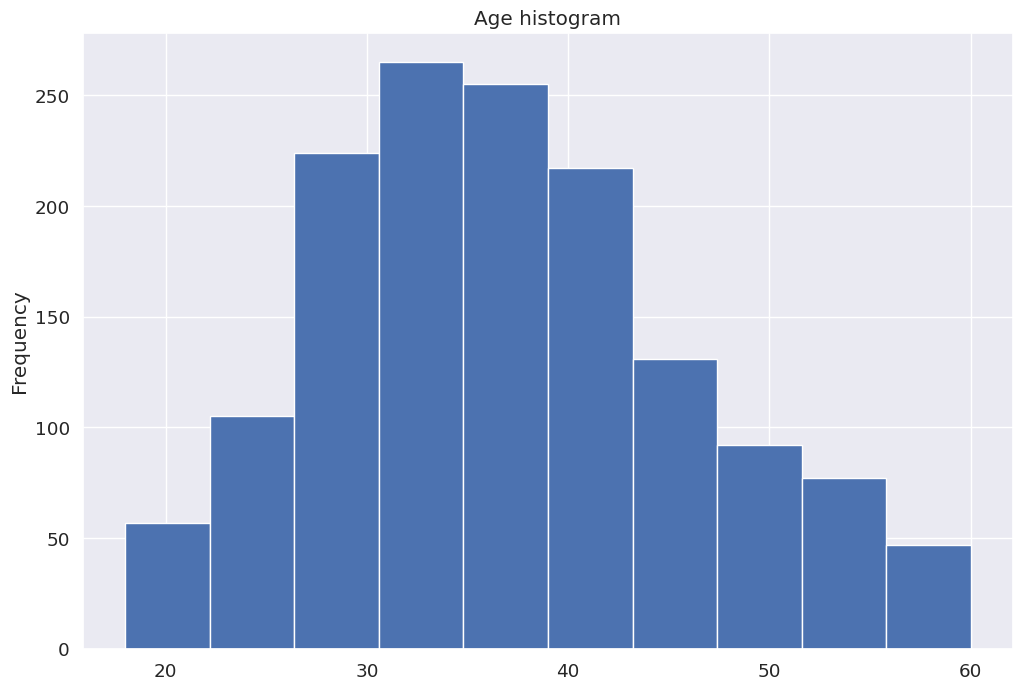

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Age histogram')
data['Age'].plot(kind = 'hist')
plt.show()

In [ ]:
data['Age_cut'] = pd.cut(data['Age'], 5, labels=[0, 1, 2, 3, 4]).astype(object)

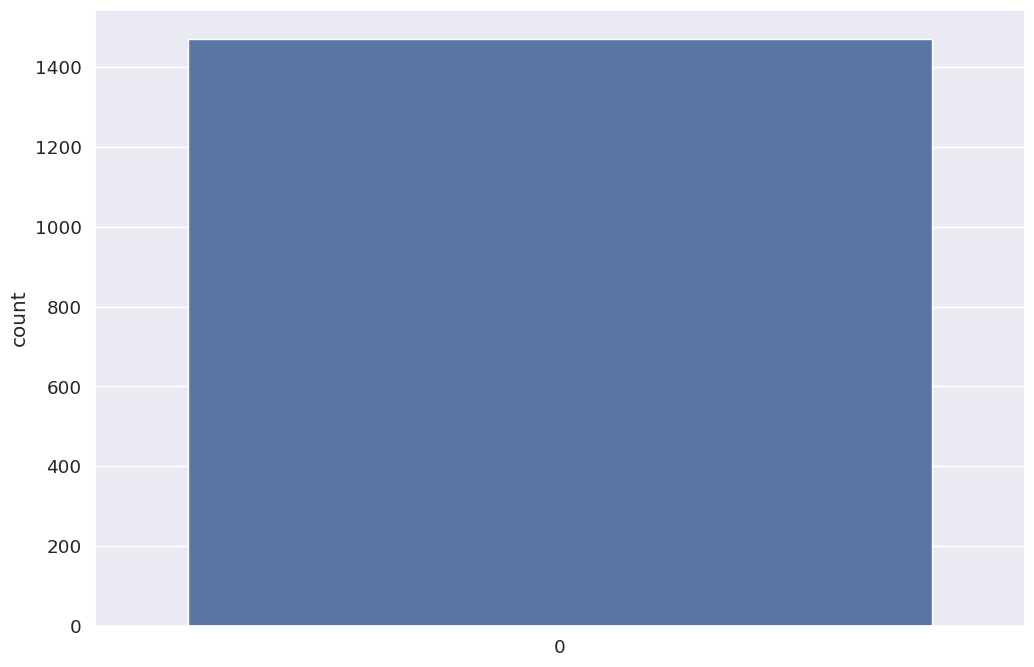

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data.NumCompaniesWorked)
plt.show()

In [ ]:
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                    1        College  Life Sciences                  Medium   
1                    8  Below College  Life Sciences                    High   
2                    2        College          Other               Very High   
3                    3         Master  Life Sciences               Very High   
4                    2  Below College        Medical                     Low   
...                ...            ...            ...                     ...   
1465                23        College        Medical                    High   
1466                 6  Below College        Medical               Very High   
1467                 4       Bachelor  Life Sciences                  Medium   
1468                 2       Bachelor        Medical               Very High   
1469                 8       Bachelor        Medical                  Medium   

      Gender  HourlyRate JobInvolvement JobLevel                    JobRole  \
0     Female          94           High        2            Sales Executive   
1       Male          61         Medium        2         Research Scientist   
2       Male          92         Medium        1      Laboratory Technician   
3     Female          56           High        1         Research Scientist   
4       Male          40           High        1      Laboratory Technician   
...      ...         ...            ...      ...                        ...   
1465    Male          41      Very High        2      Laboratory Technician   
1466    Male          42         Medium        3  Healthcare Representative   
1467    Male          87      Very High        2     Manufacturing Director   
1468    Male          63         Medium        2            Sales Executive   
1469    Male          82      Very High        2      Laboratory Technician   

     JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0          Very High        Single           5993        19479   
1             Medium       Married           5130        24907   
2               High        Single           2090         2396   
3               High       Married           2909        23159   
4             Medium       Married           3468        16632   
...              ...           ...            ...          ...   
1465       Very High       Married           2571        12290   
1466             Low       Married           9991        21457   
1467          Medium       Married           6142         5174   
1468          Medium       Married           5390        13243   
1469            High       Married           4404        10228   

     NumCompaniesWorked OverTime  PercentSalaryHike PerformanceRating  \
0                     8      Yes                 11         Excellent   
1                     1       No                 23       Outstanding   
2                     6      Yes                 15         Excellent   
3                     1      Yes                 11         Excellent   
4            

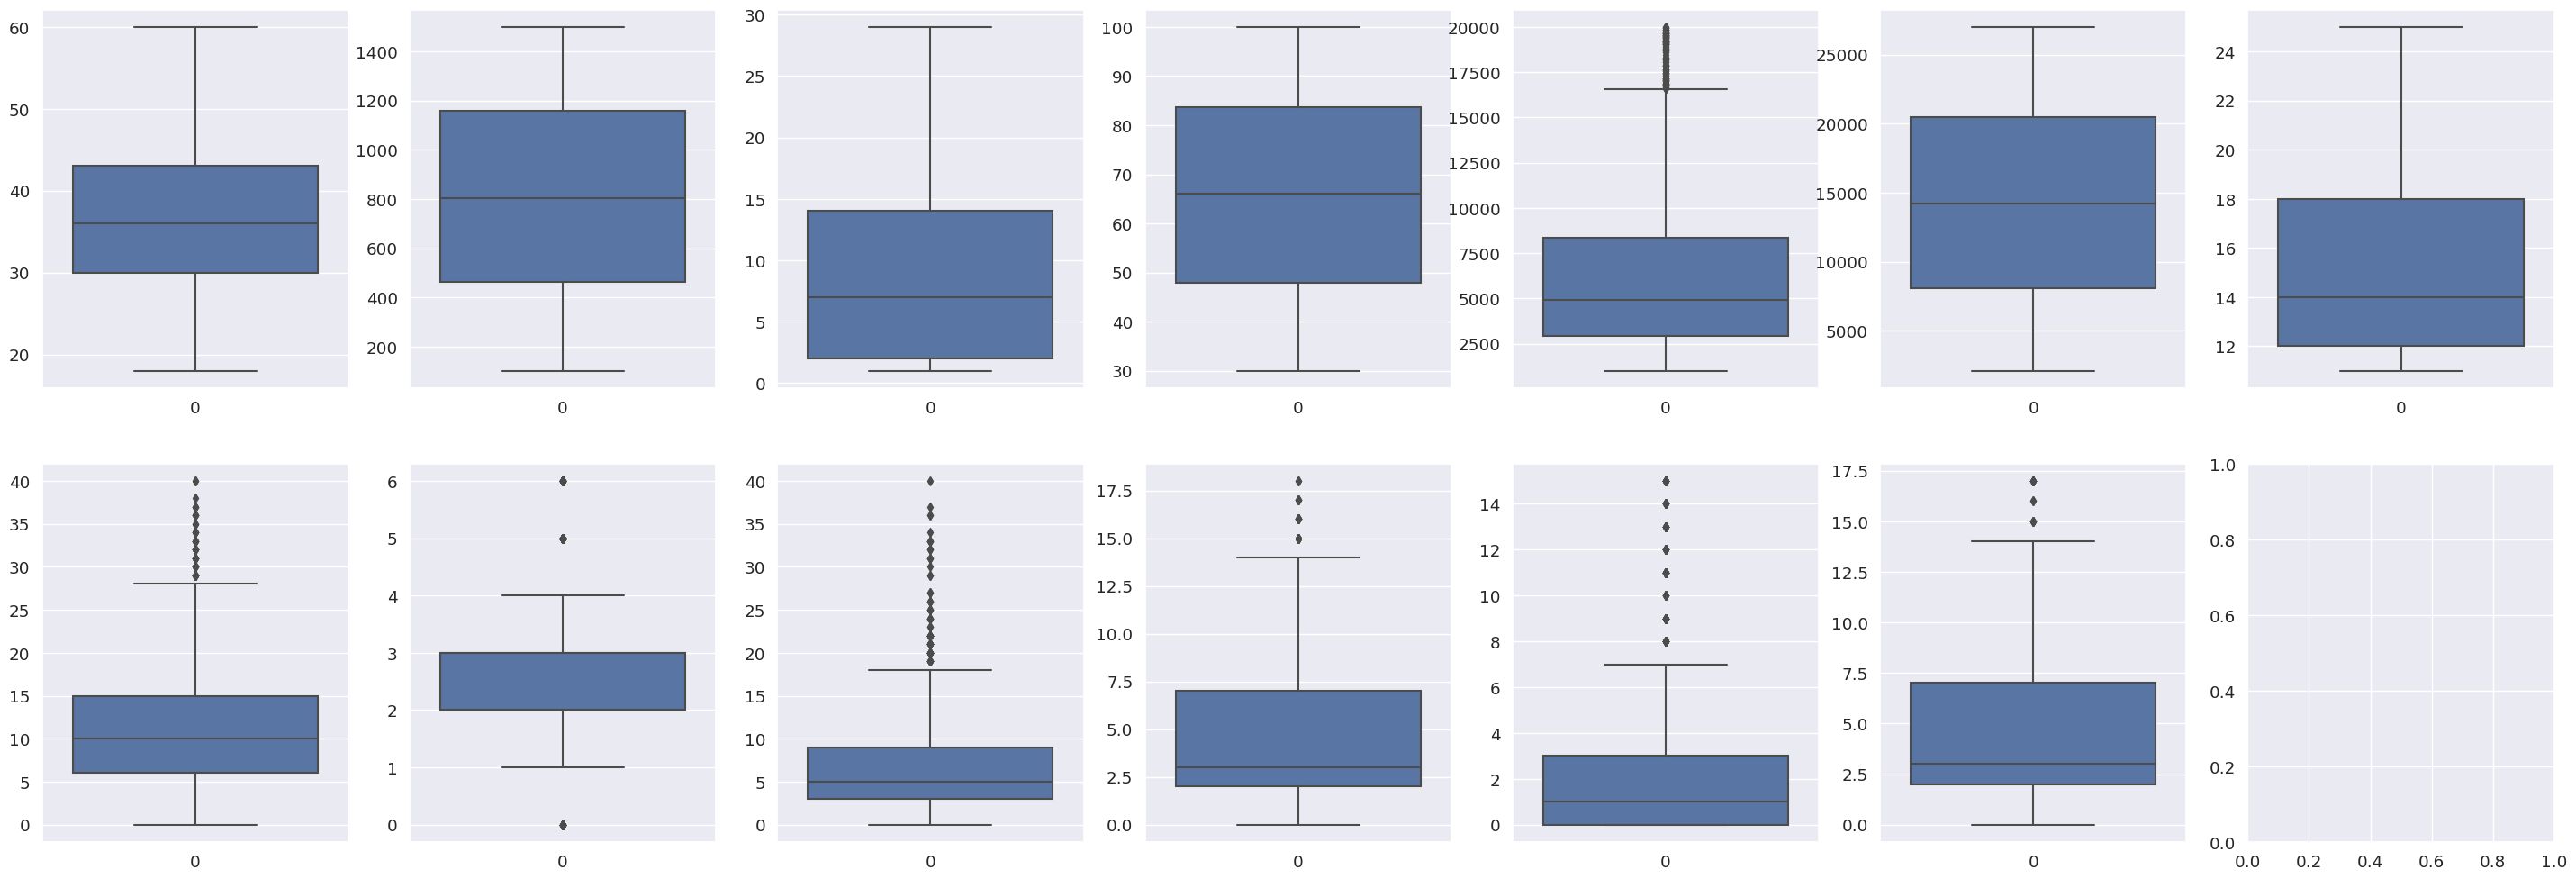

In [ ]:
cont_cols = [i for i in data.columns if data[i].dtype != object]
fig, ax = plt.subplots(2, 7, figsize=(36, 12))
ax = ax.flatten()

for index, col in enumerate(cont_cols):
    sns.boxplot(data[col], ax=ax[index])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

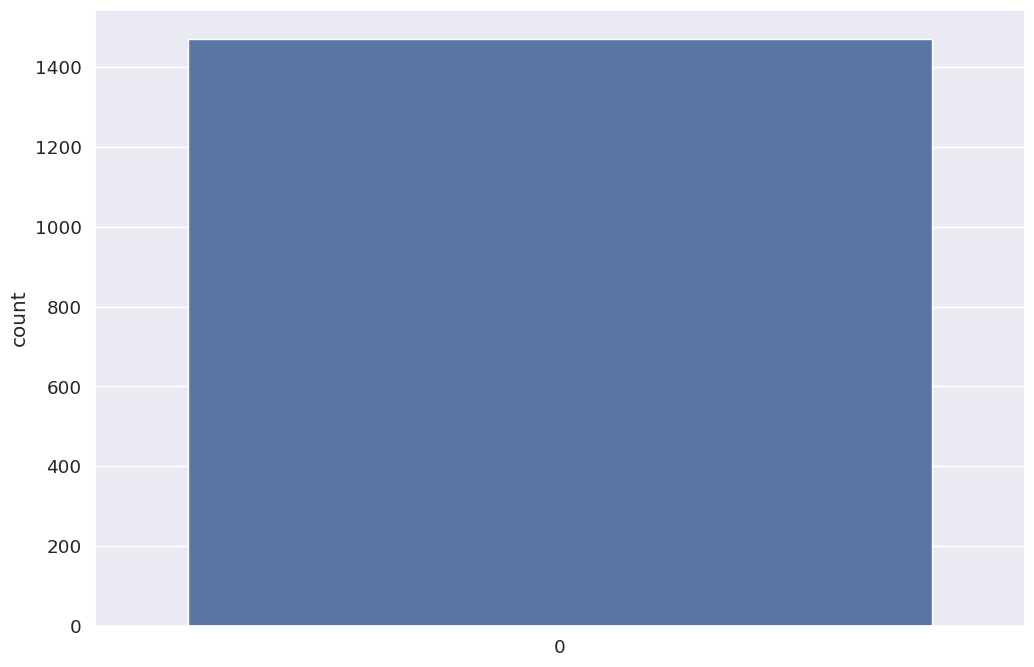

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data.NumCompaniesWorked)
plt.show()

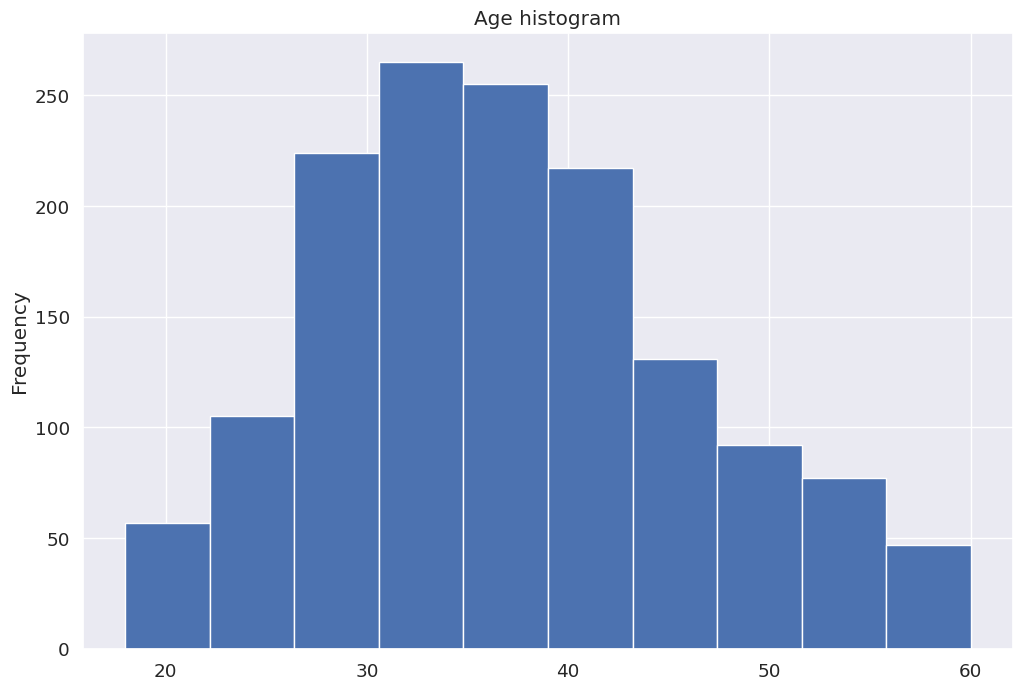

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Age histogram')
data['Age'].plot(kind = 'hist')
plt.show()

In [ ]:
data['Age_cut'] = pd.cut(data['Age'], 5, labels=[0, 1, 2, 3, 4]).astype(object)

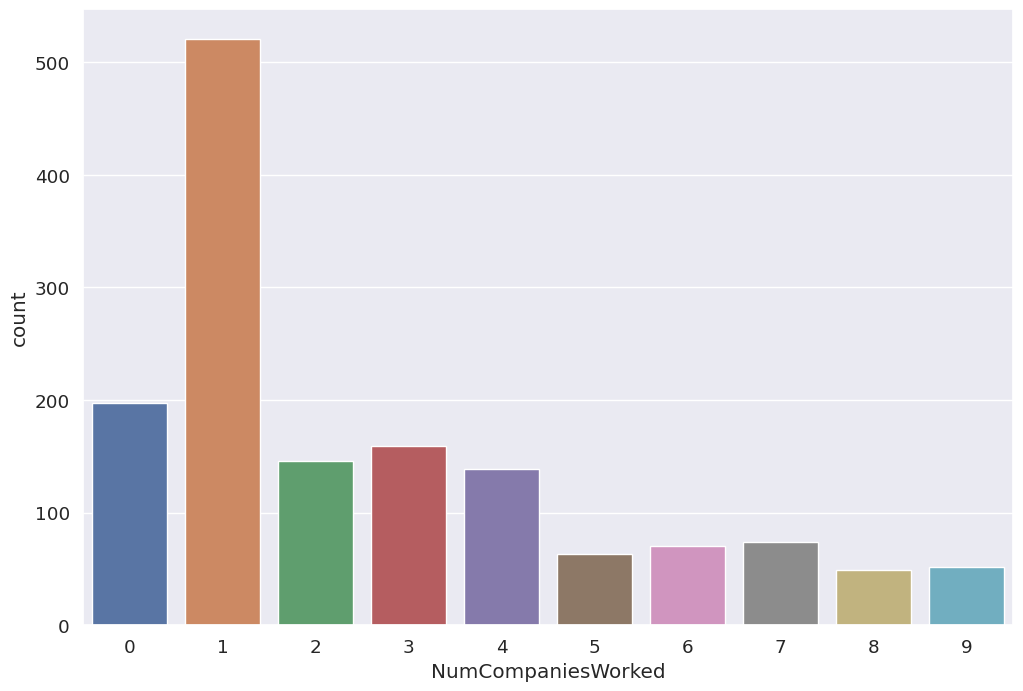

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='NumCompaniesWorked', data=data)
plt.show()

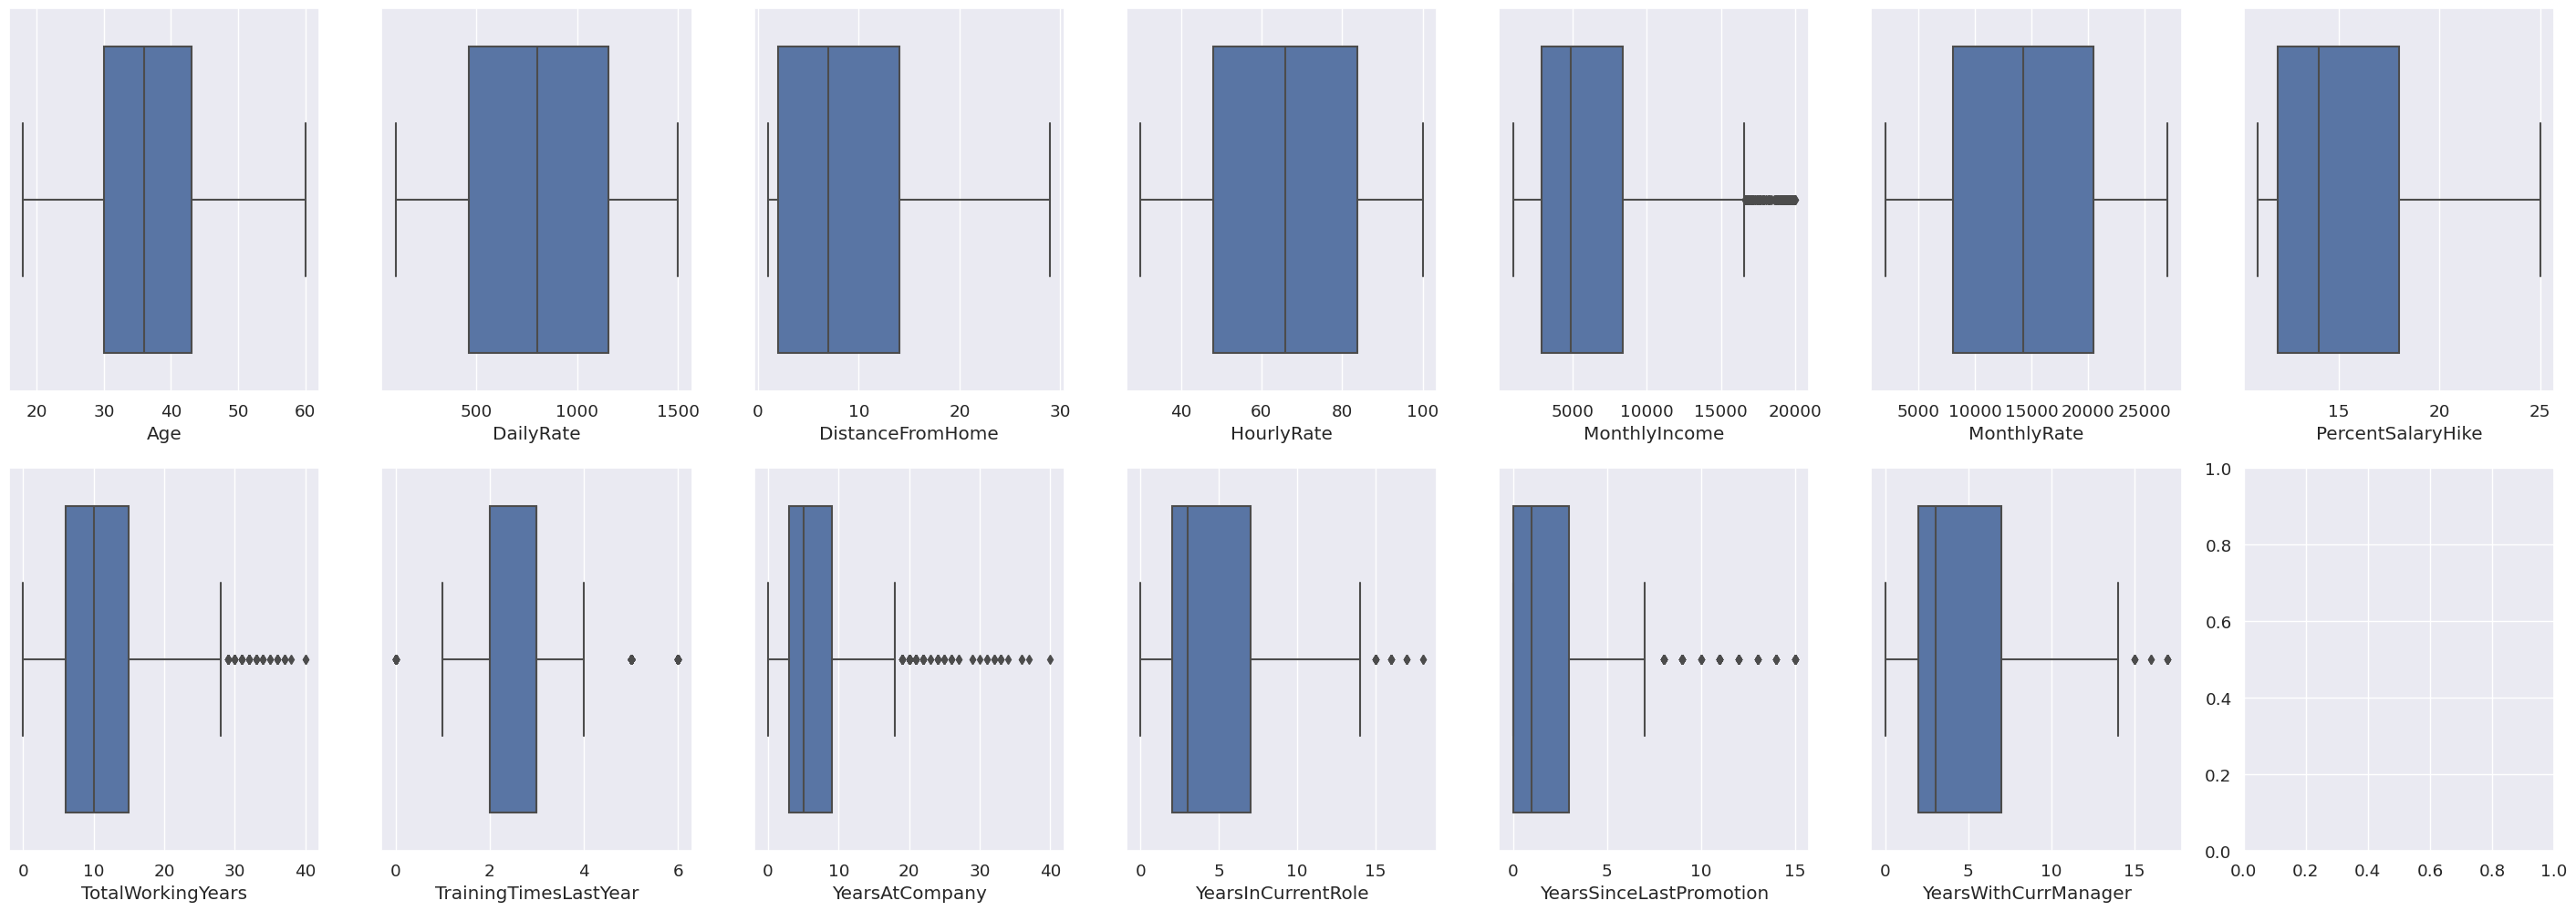

In [ ]:
cont_cols = [i for i in data.columns if data[i].dtype != object]
fig, ax = plt.subplots(2, 7, figsize=(36, 12))
ax = ax.flatten()

for index, col in enumerate(cont_cols):
    sns.boxplot(x=col, data=data, ax=ax[index])

In [ ]:
cont_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'FarFromHome',
       'LowMonthlyIncome', 'Age_cut'],
      dtype='object')

In [ ]:
def outlier(data, col):
    q1 = np.percentile(data[col], 25) 
    q3 = np.percentile(data[col], 75)
    IQR = q3 - q1
    outlier_step = 1.5 * IQR
    return data[(data[col] < q1 - outlier_step) | (data[col] > q3 + outlier_step)]

MonthlyIncome의 아웃라이어 갯수 114개
전체 데이터의 0.08% 차지
No     109
Yes      5
Name: Attrition, dtype: int64


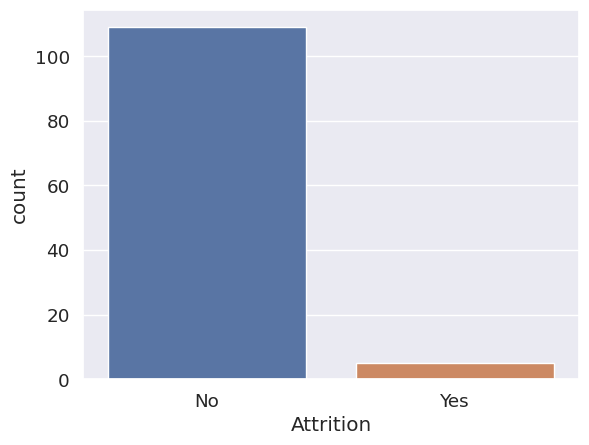

In [ ]:
monthlyincom_outlier = outlier(data, 'MonthlyIncome')
print(f'MonthlyIncome의 아웃라이어 갯수 {monthlyincom_outlier.shape[0]}개')
print(f'전체 데이터의 {round(monthlyincom_outlier.shape[0] / data.shape[0],2)}% 차지')
print(monthlyincom_outlier.Attrition.value_counts())
sns.countplot(x='Attrition', data=monthlyincom_outlier)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_corr.values, i) for i in range(data_corr.shape[1])]
vif["features"] = data_corr.columns
vif.sort_values(by='VIF Factor', ascending = False)

VIF Factor                            features
17  13640.716455                    Department_Sales
16  13522.448575   Department_Research & Development
22   3238.702786        EducationField_Life Sciences
5    3212.315104                       MonthlyIncome
24   2882.516493              EducationField_Medical
23   1749.979398            EducationField_Marketing
44   1229.895130             JobRole_Sales Executive
26    816.753726     EducationField_Technical Degree
37    740.090127                          JobLevel_5
36    721.256599                          JobLevel_4
38    580.597267             JobRole_Human Resources
25    503.944369                EducationField_Other
35    344.522261                          JobLevel_3
45    249.398879        JobRole_Sales Representative
8     235.109044                   TotalWorkingYears
40    196.264859                     JobRole_Manager
34    162.649949                          JobLevel_2
10    161.956363                      YearsAtCompany
43    107.302581          JobRole_Research Scientist
39     91.089185       JobRole_Laboratory Technician
69     88.607126              WorkLifeBalance_Better
50     73.095522                MaritalStatus_Single
70     65.434059                WorkLifeBalance_Good
42     53.287587           JobRole_Research Director
11     40.420495                  YearsInCurrentRole
65     38.927425                  StockOptionLevel_1
13     37.935563                YearsWithCurrManager
68     29.813928                WorkLifeBalance_Best
51     21.270629                NumCompaniesWorked_1
1      20.328417                                 Age
7      19.126971                   PercentSalaryHike
61     18.554877       PerformanceRating_Outstanding
41     16.536042      JobRole_Manufacturing Director
15     15.969357        BusinessTravel_Travel_Rarely
14     15.703952    BusinessTravel_Travel_Frequently
53     14.656369                NumCompaniesWorked_3
66     14.637033                  StockOptionLevel_2
52     12.851189                NumCompaniesWorked_2
49     12.089123               MaritalStatus_Married
54     12.066410                NumCompaniesWorked_4
12     10.986051             YearsSinceLastPromotion
67      8.399376                  StockOptionLevel_3
56      6.210026                NumCompaniesWorked_6
57      6.093062                NumCompaniesWorked_7
55      5.382364                NumCompaniesWorked_5
59      4.785775                NumCompaniesWorked_9
0       4.706463                       Attrition_Yes
58      4.495559                NumCompaniesWorked_8
48      3.975349           JobSatisfaction_Very High
64      3.799682  RelationshipSatisfaction_Very High
21      3.694006                    Education_Master
29      3.634595   EnvironmentSatisfaction_Very High
62      3.628168        RelationshipSatisfaction_Low
46      3.556749                 JobSatisfaction_Low
27      3.444139         EnvironmentSatisfaction_Low
47      3.402401              JobSatisfaction_Medium
28      3.310664      EnvironmentSatisfaction_Medium
63      3.220096     RelationshipSatisfaction_Medium
19      3.059469                   Education_College
18      2.625621             Education_Below College
60      1.823511                        OverTime_Yes
31      1.796165                  JobInvolvement_Low
33      1.726490            JobInvolvement_Very High
20      1.706147                    Education_Doctor
32      1.687609               JobInvolvement_Medium
3       1.580221                    DistanceFromHome
2       1.447858                           DailyRate
6       1.379119                         MonthlyRate
4       1.349891                          HourlyRate
30      1.328611                         Gender_Male
9       1.318633               TrainingTimesLastYear

MonthlyIncome의 아웃라이어 갯수 114개
전체 데이터의 8.0% 차지
No     109
Yes      5
Name: Attrition, dtype: int64


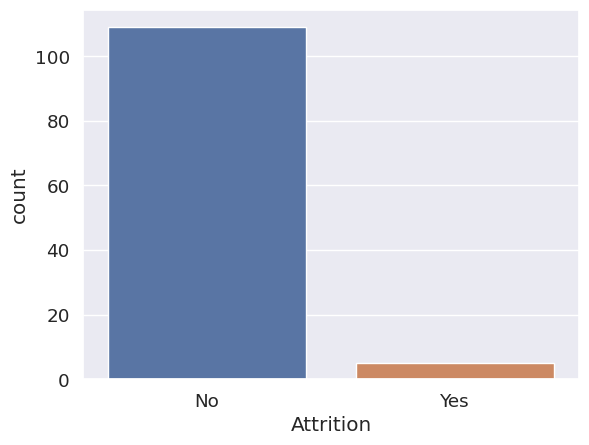

In [ ]:
monthlyincom_outlier = outlier(data, 'MonthlyIncome')
print(f'MonthlyIncome의 아웃라이어 갯수 {monthlyincom_outlier.shape[0]}개')
print(f'전체 데이터의 {round(monthlyincom_outlier.shape[0] / data.shape[0],2)*100}% 차지')
print(monthlyincom_outlier.Attrition.value_counts())
sns.countplot(x='Attrition', data=monthlyincom_outlier)
plt.show()


TrainingTimesLastYear의 아웃라이어 갯수 238개
전체 데이터의 16.0% 차지
No     203
Yes     35
Name: Attrition, dtype: int64


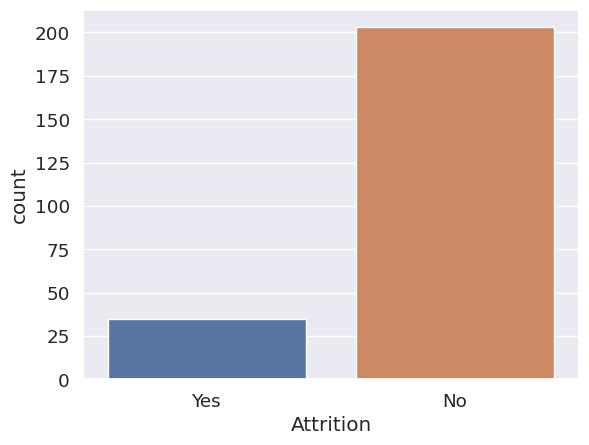

In [ ]:
traininigtimes_outlier = outlier(data, 'TrainingTimesLastYear')
print(f'TrainingTimesLastYear의 아웃라이어 갯수 {traininigtimes_outlier.shape[0]}개')
print(f'전체 데이터의 {round(traininigtimes_outlier.shape[0] / data.shape[0],2)*100}% 차지')
print(traininigtimes_outlier.Attrition.value_counts())
sns.countplot(x='Attrition', data = traininigtimes_outlier)
plt.show()

YearsAtCompany의 아웃라이어 갯수 104개
전체 데이터의 7.000000000000001% 차지
No     94
Yes    10
Name: Attrition, dtype: int64


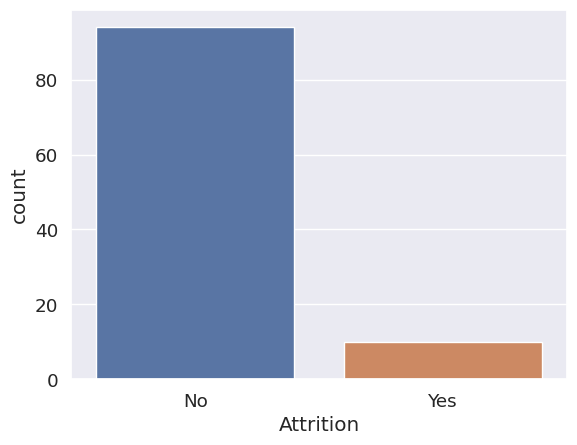

In [ ]:
yearsatcompany_outlier = outlier(data, 'YearsAtCompany')
print(f'YearsAtCompany의 아웃라이어 갯수 {yearsatcompany_outlier.shape[0]}개')
print(f'전체 데이터의 {round(yearsatcompany_outlier.shape[0] / data.shape[0],2)*100}% 차지')
print(yearsatcompany_outlier.Attrition.value_counts())
sns.countplot(x = 'Attrition', data = yearsatcompany_outlier)
plt.show()

YearsWithCurrManager의 아웃라이어 갯수 14개
전체 데이터의 1.0% 차지
No    14
Name: Attrition, dtype: int64


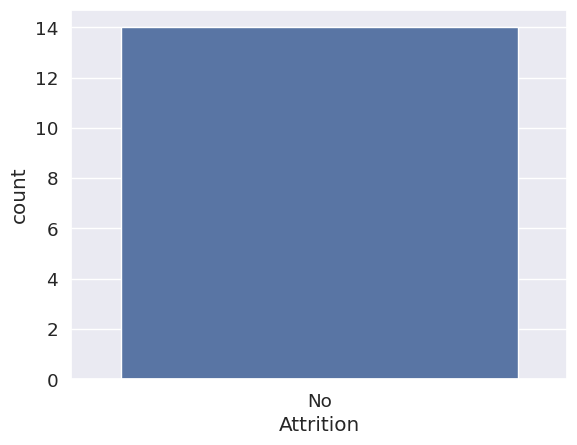

In [ ]:
yearswithcurrmanager_outlier = outlier(data, 'YearsWithCurrManager')
print(f'YearsWithCurrManager의 아웃라이어 갯수 {yearswithcurrmanager_outlier.shape[0]}개')
print(f'전체 데이터의 {round(yearswithcurrmanager_outlier.shape[0] / data.shape[0],2)*100}% 차지')
print(yearswithcurrmanager_outlier.Attrition.value_counts())
sns.countplot(x = 'Attrition', data = yearswithcurrmanager_outlier)
plt.show()